# Homework 2 (Tutorial 5)
## MA course in Artificial Intelligence 2022/2023

@author: Filippo Casari


In [12]:
#!rm -rf AI2022MA
#!git clone https://github.com/UmbertoJr/AI2022MA.git


In [13]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from AI2022MA.DeJongFunctions import DeJong


## Genetics Algorithm (GA) for Dejong Function Optimization (FO)

### De Jong Functions

De Jong 1,
Global minimum = 0,
Dimension (genes): 3,
Range interval: (-5.12, 5.12),
Resolution factor: 0.01,
Number of bits for dimension: 10,
Number of bits for individual: 30.


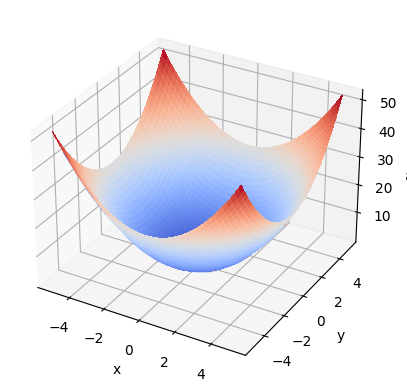

In [14]:
# Creating a DeJong object with the function number 1.
DJ1 = DeJong(1)
# Printing the function name, global minimum, dimension, range interval, resolution factor, number of bits for dimension,
# and number of bits for individual. It is also plotting the function.
print(
    f"{DJ1.function_name},\nGlobal minimum = 0,\nDimension (genes): {DJ1.dimension},\nRange interval: {DJ1.range},\nResolution factor: {DJ1.resolution_factor},\nNumber of bits for dimension: {DJ1.num_bits},\nNumber of bits for individual: {DJ1.num_bits * DJ1.dimension}.")
DJ1.plot()


De Jong 2 or Rosenbrock’s valley or banana function,
Global minimum = 0,
Dimension (genes): 2,
Range interval: (-2.048, 2.048),
Resolution factor: 0.001,
Number of bits for dimension: 12,
Number of bits for individual: 24.


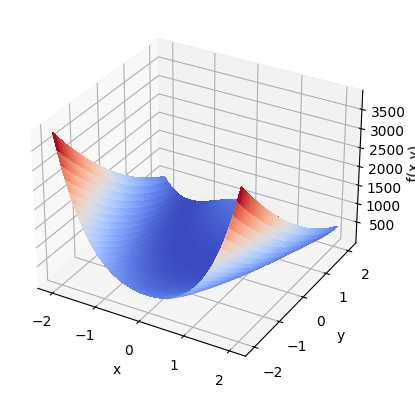

In [15]:
# Creating a DeJong object with the function number 2.
DJ2 = DeJong(2)
print(
    f"{DJ2.function_name} or Rosenbrock’s valley or banana function,\nGlobal minimum = 0,\nDimension (genes): {DJ2.dimension},\nRange interval: {DJ2.range},\nResolution factor: {DJ2.resolution_factor},\nNumber of bits for dimension: {DJ2.num_bits},\nNumber of bits for individual: {DJ2.num_bits * DJ2.dimension}.")
DJ2.plot()


De Jong 3,
Dimension (genes): 4,
Range interval: (-5.12, 5.12),
Resolution factor: 0.01,
Number of bits for dimension: 10,
Number of bits for individual: 40.


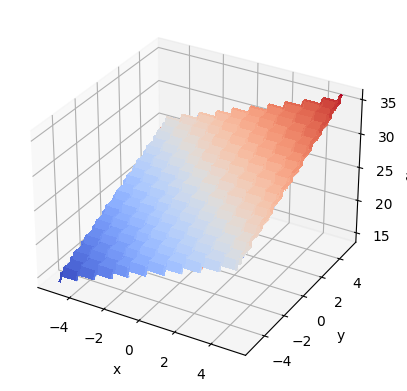

In [16]:
# Creating a DeJong object with the function number 3.
DJ3 = DeJong(3)
print(
    f"{DJ3.function_name},\nDimension (genes): {DJ3.dimension},\nRange interval: {DJ3.range},\nResolution factor: {DJ3.resolution_factor},\nNumber of bits for dimension: {DJ3.num_bits},\nNumber of bits for individual: {DJ3.num_bits * DJ3.dimension}.")
DJ3.plot()


De Jong 4,
Dimension (genes): 30,
Range interval: (-1.28, 1.28),
Resolution factor: 0.01,
Number of bits for dimension: 8,
Number of bits for individual: 240.


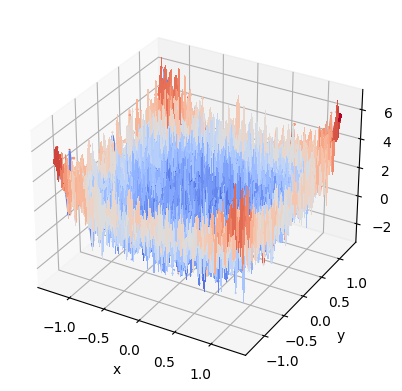

In [17]:
# Creating a DeJong object with the function number 4.
DJ4 = DeJong(4)
print(
    f"{DJ4.function_name},\nDimension (genes): {DJ4.dimension},\nRange interval: {DJ4.range},\nResolution factor: {DJ4.resolution_factor},\nNumber of bits for dimension: {DJ4.num_bits},\nNumber of bits for individual: {DJ4.num_bits * DJ4.dimension}.")
DJ4.plot()


De Jong 5,
Dimension (genes): 2,
Range interval: (-65.536, 65.536),
Resolution factor: 0.001,
Number of bits for dimension: 17,
Number of bits for individual: 34.


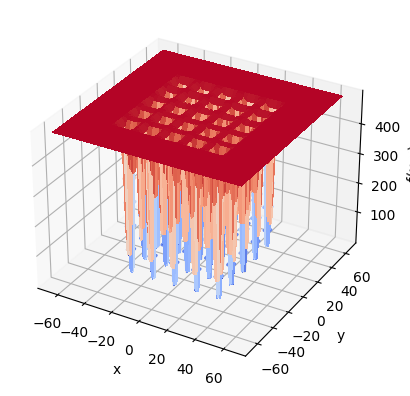

In [18]:
# Creating a DeJong object with the function number 5.
DJ5 = DeJong(5)
print(
    f"{DJ5.function_name},\nDimension (genes): {DJ5.dimension},\nRange interval: {DJ5.range},\nResolution factor: {DJ5.resolution_factor},\nNumber of bits for dimension: {DJ5.num_bits},\nNumber of bits for individual: {DJ5.num_bits * DJ5.dimension}.")
DJ5.plot()


### Gray encode and decode functions

In [19]:
print("DEC    =>    GRAY    => DEC")
# Creating an array of numbers that will be used to test the gray encoding and decoding.
elem_to_decode = 5
neg_numbers = np.arange(
    DJ2.range[0], DJ2.range[0] + elem_to_decode * DJ2.resolution_factor, DJ2.resolution_factor)
pos_numbers = np.arange(DJ2.range[1] - (elem_to_decode - 1)
                        * DJ2.resolution_factor, DJ2.range[1], DJ2.resolution_factor)
numbers = np.concatenate((neg_numbers, pos_numbers))

# Printing the decimal, gray, and decimal representation of the numbers in the array `numbers`.
for i in numbers:

    gray = DJ2.gray_encode(i)
    print(type(gray))
    dec = DJ2.gray_decode(gray)
    print(f" {i:.3f}  => {gray} => {dec}")


DEC    =>    GRAY    => DEC
<class 'str'>
 -2.048  => 000000000000 => -2.048
<class 'str'>
 -2.047  => 000000000001 => -2.047
<class 'str'>
 -2.046  => 000000000011 => -2.046
<class 'str'>
 -2.045  => 000000000010 => -2.045
<class 'str'>
 -2.044  => 000000000110 => -2.044
<class 'str'>
 2.044  => 100000000010 => 2.044
<class 'str'>
 2.045  => 100000000011 => 2.045
<class 'str'>
 2.046  => 100000000001 => 2.046
<class 'str'>
 2.047  => 100000000000 => 2.047
<class 'str'>
 2.048  => 1100000000000 => 2.048


In [20]:
# Creating a population of 4 individuals, each individual has 2 genes.
# DJ2 has dimension (genes) equal to 2, for this reason, population.shape[1] should be equal to DJ2.dimension=2
population = np.array([[-2.048, -2.047], [0, 0], [-1, 1], [2.047, 2.046]])

print(population)

# Evaluate a population non encoded with gray encode
print(DJ2.evaluate(population, gray_=False))


[[-2.048 -2.047]
 [ 0.     0.   ]
 [-1.     1.   ]
 [ 2.047  2.046]]
[3.90467787e+03 1.00000000e+00 4.00000000e+00 4.60859433e+02]


In [21]:
# Encoding the population with the gray code.
population_string = []
for i in range(population.shape[0]):
    new_ind = []
    for j in range(population.shape[1]):
        new_ind.append(DJ2.gray_encode(population[i][j]))
    population_string.append(new_ind)

population_gray = np.array(population_string)
print(population_gray)

# Evaluating a population encoded with gray encode
print(DJ2.evaluate(population_gray, gray_=True))


[['000000000000' '000000000001']
 ['110000000000' '110000000000']
 ['011000010100' '111000011100']
 ['100000000000' '100000000001']]
[3.90467787e+03 1.00000000e+00 4.00000000e+00 4.60859433e+02]


In [22]:
array1 = np.random.uniform(low=0., high=1., size=6)
array2 = np.random.uniform(low=0., high=1., size=6)

first_part = array1[3:]
first_part = array1[:3]


### Genetic Algorithm Class

In [23]:
# It's a class that implements a genetic algorithm for the De Jong function
import random
import math
class GeneticAlgorithmForDJ:

    def __init__(self, dj_instance, selection_rule, elitism=False, population_array=None, population_size=20,
                 mutation_rate=0.01, iterations=600):
        """
        This function initializes the genetic algorithm with the given parameters.

        :param dj_instance:      This is the instance of the De Jong model that you want to optimise.
        :param selection_rule:   The selection rule to be used. Can be either 'rank' or 'roulette'.
        :param elitism:          True or False. If True, the best individual in the population will be carried over
                                 to the next generation. Defaults to False (optional), in this case only the population
                                 is replaced by the new generation.
        :param population_array: Optional parameter, can contain an initial array with the population. It is a list of
                                 lists, where each inner list correspond to an individual of the population.
        :param population_size:  The number of individuals in the population, defaults to 20 (optional).
        :param mutation_rate:    The probability of a gene mutating, defaults 0.01 (optional).
        :param iterations:       The number of iterations to run the algorithm for, defaults to 600 (optional).
        """

        self.dj_instance = dj_instance
        self.dimension = self.dj_instance.dimension
        self.dimension_bits = self.dj_instance.num_bits
        self.selection_rule = selection_rule
        self.population_size = population_size
        self.population_array = population_array
        self.mutation_rate = mutation_rate
        self.iterations = iterations
        self.elitism = elitism
        self.old_population = self.population_array

        # Encoding functions
        self.encoding_function = np.vectorize(self.dj_instance.gray_encode)
        self.decoding_function = np.vectorize(self.dj_instance.gray_decode)

        # Statistics variables
        # ...
        self.best_indivudual = None
        self.worst_individual = None
        self.best_solution = None

        # Additional variables
        # ...
        self.best_iteration = 0
        self.best_evaluation = 0
        self.couple_parents = None
        self.evaluations = []

    def solve(self):
        """
        This function is the main of the class `GeneticAlgorithm`. It performs the main loop of the algorithm,
        and it calls the other functions of the class.
        """
        # Initialise population
        # ...
        self.population_array = self.initialise_population()
        # print(self.population_array)

        # Evaluate population
        self.evaluation = self.dj_instance.evaluate(
            self.population_array, gray_=True)
        self.best_evaluation = sum(self.evaluation)
        self.best_solution = None
        # print(self.evaluation)
        self.best_indivudual = min(self.evaluation)
        self.worst_individual = max(self.evaluation)
        # ...
        #self.best_solution = self.population_array
        for iteration in range(self.iterations):

            # Select parents
            # ...
            # self.selected_parents_array=list()
            self.new_population = list()

            # self.computing_probability()

            for i in range(10):

                self.couple_parents = self.selection()
                # self.selected_parents_array.append(self.couple_parents)
                son1, son2 = self.crossover()

                #print(son1, son2)
                self.new_population.append(son1)
                self.new_population.append(son2)
            #print("number of new individuals: ", self.new_population)

            #self.selected_parents = np.array(self.selected_parents)
            #print("selected parents:" ,self.selected_parents)
            # Generates new individuals using reproduction rules
            # ...
            # self.crossover()
            # Form a new population
            # ...

            # Evaluate population
            # ...
            self.old_population = self.population_array
            self.population_array = np.array(self.new_population)
            self.mutation()
            if (self.elitism):
                self.population_array = self.elitism_selection()
            best_score_individual = np.argmin(
                self.dj_instance.evaluate(self.population_array, gray_=True))

            if (best_score_individual < self.best_evaluation):
                self.best_evaluation = best_score_individual
                self.best_iteration = iteration
                self.best_solution = self.population_array[best_score_individual]
            #print("evaluation: ", self.dj_instance.evaluate(self.population_array, gray_=True)/self.population_size)
            #print("new population: \n", self.population_array)
            #self.evaluation = (self.dj_instance.evaluate(self.population_array, gray_=True))
            self.evaluations.append(sum(self.dj_instance.evaluate(
                self.population_array, gray_=True))/self.population_size)

    def initialise_population(self):
        """
        This function generates a random population of shape `population_size` and `dimension` with values between
        `range[0]` and `range[1]`.
        :return: The population encoded using gray code.
        """
        population = np.random.uniform(low=self.dj_instance.range[0], high=self.dj_instance.range[1], size=(
            self.population_size, self.dimension))
        #population_string = []
        # for i in range(population.shape[0]):
        #  new_ind = []
        #  for j in range(population.shape[1]):
        #    new_ind.append(DJ2.gray_encode(population[i][j]))
        #  population_string.append(new_ind)
        #
        #population_gray = np.array(population_string)
        population_gray = self.encoding_function(population)
        # print(population_gray)
        return population_gray

    def compute_fitness(self):
        """
        :return:
        """

        return self.dj_instance.evaluate(self.population_array, gray_=True)

    def rank_selection(self):
        """
        This function compute the individual probability of selection using rank selection rule.
        :return: The probability of each individual being selected for the next generation.
        """
        #Probs = np.random.random(size=self.population_array.shape[0])
        Probabilities = [0.]*self.population_size
        # print(Probabilities)
        # note that i must start from 1 and not 0
        self.worst_individual = max(self.dj_instance.evaluate(
            self.population_array, gray_=True))
        self.best_evaluation = min(self.dj_instance.evaluate(
            self.population_array, gray_=True))
        for i in range(self.population_array.shape[0]):
            numerator = (self.worst_individual)+(self.best_indivudual -
                                                 self.worst_individual)*((i)/float(self.population_size-1.))
            Probabilities[i] = (1.*numerator)/float(self.population_size)
        Probabilities = Probabilities/sum(Probabilities)
        #print("sum of prob: ", sum(Probabilities))
        #Probabilities = self.computing_probability()
        #print("Probabilities: ", Probabilities)
        #print("population: ", self.population_array)
        #assert(sum(Probabilities) == 1.)
        #print("evaluation: ", self.dj_instance.evaluate(self.population_array, gray_=True))
        population_array_index = [x for _, x in sorted(zip(self.dj_instance.evaluate(
            self.population_array, gray_=True), list(range(0, self.population_array.shape[0], 1))))]
        #print("old pop: ", population_array_index)
        for i in range(self.population_array.shape[0]):
            tmp = self.population_array[i]
            self.population_array[i] = self.population_array[population_array_index[i]]
            self.population_array[population_array_index[i]] = tmp

        # print(self.decoding_function(self.population_array))
        return (Probabilities)
    
    def roulette_selection(self):
        """
        This function compute the individual probability of selection using roulette selection rule.
        :return: The probability of each individual being selected for the next generation.
        """
        evaluation = self.dj_instance.evaluate(self.population_array, gray_=True)
        
        if(evaluation.any()<0.):
            
            evaluation = 1./evaluation
        Probabilities = (evaluation)/sum(evaluation)
        
        Probabilities = Probabilities/sum(Probabilities)
        #print(Probabilities)
        #print(Probabilities)
        #print(sum(Probabilities))
        
        
        #print("len of probabilities: ", len(Probabilities))
        #print("Probabilities: ", sum(Probabilities))
        return Probabilities

    def compute_sel_prob(self, population_fitness):
        """Computes and generates tuples of (rank, individual_fitness,
        selection_probability) for each individual's fitness, using the Linear
        Ranking Selection algorithm."""
        # Get the number of individuals in the population.
        n = len(population_fitness)

        # Use the gauss formula to get the sum of all ranks (sum of integers 1 to N).
        rank_sum = n * (n + 1) / 2

        # Sort and go through all individual fitnesses; enumerate ranks from 1.
        for rank, ind_fitness in enumerate(sorted(population_fitness), 1):
            yield rank, ind_fitness, float(rank) / rank_sum

    def computing_probability(self):

        #print("Rank Fitness Sel.prob.")
        # Iterate through the computed tuples and print the table rows.
        probabilities = list()
        for rank, ind_fitness, sel_prob in self.compute_sel_prob(self.evaluation):

            #print("%4d %7.2f %8.2f%%" % (rank, ind_fitness, sel_prob * 100))
            probabilities.append(sel_prob)
        return np.array(probabilities)

    def selection(self):
        """
        This function is used to select the parents for the next generation according to a selection rule.
        """
        # Computing the probability of each individual to be selected as parent.
        # ...

        if (self.selection_rule == 'rank'):
            prob = self.rank_selection()
        else:
            prob = self.roulette_selection()
            

        # Selecting the parents for the next generation using probabilities.
        # ...
        
        return np.array(random.choices(population=self.population_array, weights=prob, k=2))

    def crossover(self):
        """
        This function perform a single-point crossover on each pair of parents, selected by pairing the first half of
        the parents with the second half of them.
        """
        index = np.random.randint(0, len(self.population_array[0][0]))
        father = np.array(self.couple_parents[0])
        mother = np.array(self.couple_parents[1])
        son1 = list()
        son2 = list()
        #print("father: ", father)
        #print("fmother: ", mother)
        #print("index chosen: ", index)
        for gene_f, gene_m in zip(father, mother):
            #print(gene_f, gene_m)
            son1_gene = np.concatenate(
                [list(gene_f)[:index], list(gene_m)[index:]])
            son2_gene = np.concatenate(
                [list(gene_m)[:index], list(gene_f)[index:]])
            son1.append((son1_gene))
            son2.append((son2_gene))
        son1_clone = ['']*self.population_array.shape[1]
        son2_clone = ['']*self.population_array.shape[1]

        for i in range(len(son1)):

            son1_clone[i], son2_clone[i] = "".join(son1[i]), "".join(son2[i])
        #son1 = "".join(son1)
        #son2 = "".join(son2)
        #print("son1: ",son1_clone)
        #print("son2: ",son2_clone)
        #son2 = np.concatenate([mother[:index], father[index:]])
        return son1_clone, son2_clone

    def mutation(self):
        """
        This function, decide if mutate or not each bit of each offspring in each child, by flip it, with a mutation
        rate, otherwise keep it the same.
        """

        for i in range(len(self.population_array)):
            for j in range(len(self.population_array[i])):
                string = ""
                for c in self.population_array[i][j]:
                    if (self.mutation_rate > np.random.rand()):
                        #print("mutaion occurred")
                        # print(self.population_array[i][j][k])
                        if (c == '1'):
                            string += '0'
                        else:
                            string += '1'
                        # print(self.population_array[i][j][k])
                    else:
                        # print(self.population_array[i][j][k])
                        string += c

                    self.population_array[i][j] = string


    def elitism_selection(self):
        """
        Generating a new population as combination of the old one and the new one.
        """
        evaluation_1 = self.dj_instance.evaluate(
            self.old_population, gray_=True)
        evaluation_2 = self.dj_instance.evaluate(
            self.population_array, gray_=True)
        all_population = np.concatenate(
            (self.old_population, self.population_array))
        all_evaluations = np.concatenate((evaluation_1, evaluation_2))
        #print("all_population shape: ", all_population.shape)
        #print("all_evaluation shape: ", all_evaluations.shape)
        population_array_index = [x for _, x in sorted(
            zip(all_evaluations, list(range(0, all_population.shape[0], 1))))]
        # print(population_array_index)
        for i in range(all_population.shape[0]):
            tmp = all_population[i]
            all_population[i] = all_population[population_array_index[i]]
            all_population[population_array_index[i]] = tmp
        best_20_individuals = all_population[self.population_array.shape[0]:]
        return best_20_individuals

    def reconstruction(self):
        """
        If elitism is enabled, this function replace the population with the 20 best individuals.
        NOTE! Already implemented into the solve() method
        """
      
    def update_statistics(self):
        """
        This function can be used to compute statistics on the objective value.
        NOTE! Already implemented into the solve() method
        """


### Settings

In [24]:
# population_size = 20
selection_rules = ['rank', 'roulette']
bool_elitism = [False, True]
methods = ['rank', 'rank + elitism', 'roulette', 'roulette + elitism']
# Single-Point Crossover
mutation_rate = 0.01
iterations = 600
seeds = [0, 42, 666]  # (Optional)

# Represent each individual of your population as a string of bits
# Each individual basically represent a point in you De Jong Function
functions = [DeJong(1), DeJong(2), DeJong(3), DeJong(4), DeJong(5)]
#functions=[DeJong(4)]


#### Test

De Jong 1
function= De Jong 1,seed = 0, sel_rule = rank, elitism = 0
function= De Jong 1,seed = 0, sel_rule = rank, elitism = 1
function= De Jong 1,seed = 0, sel_rule = roulette, elitism = 0
function= De Jong 1,seed = 0, sel_rule = roulette, elitism = 1


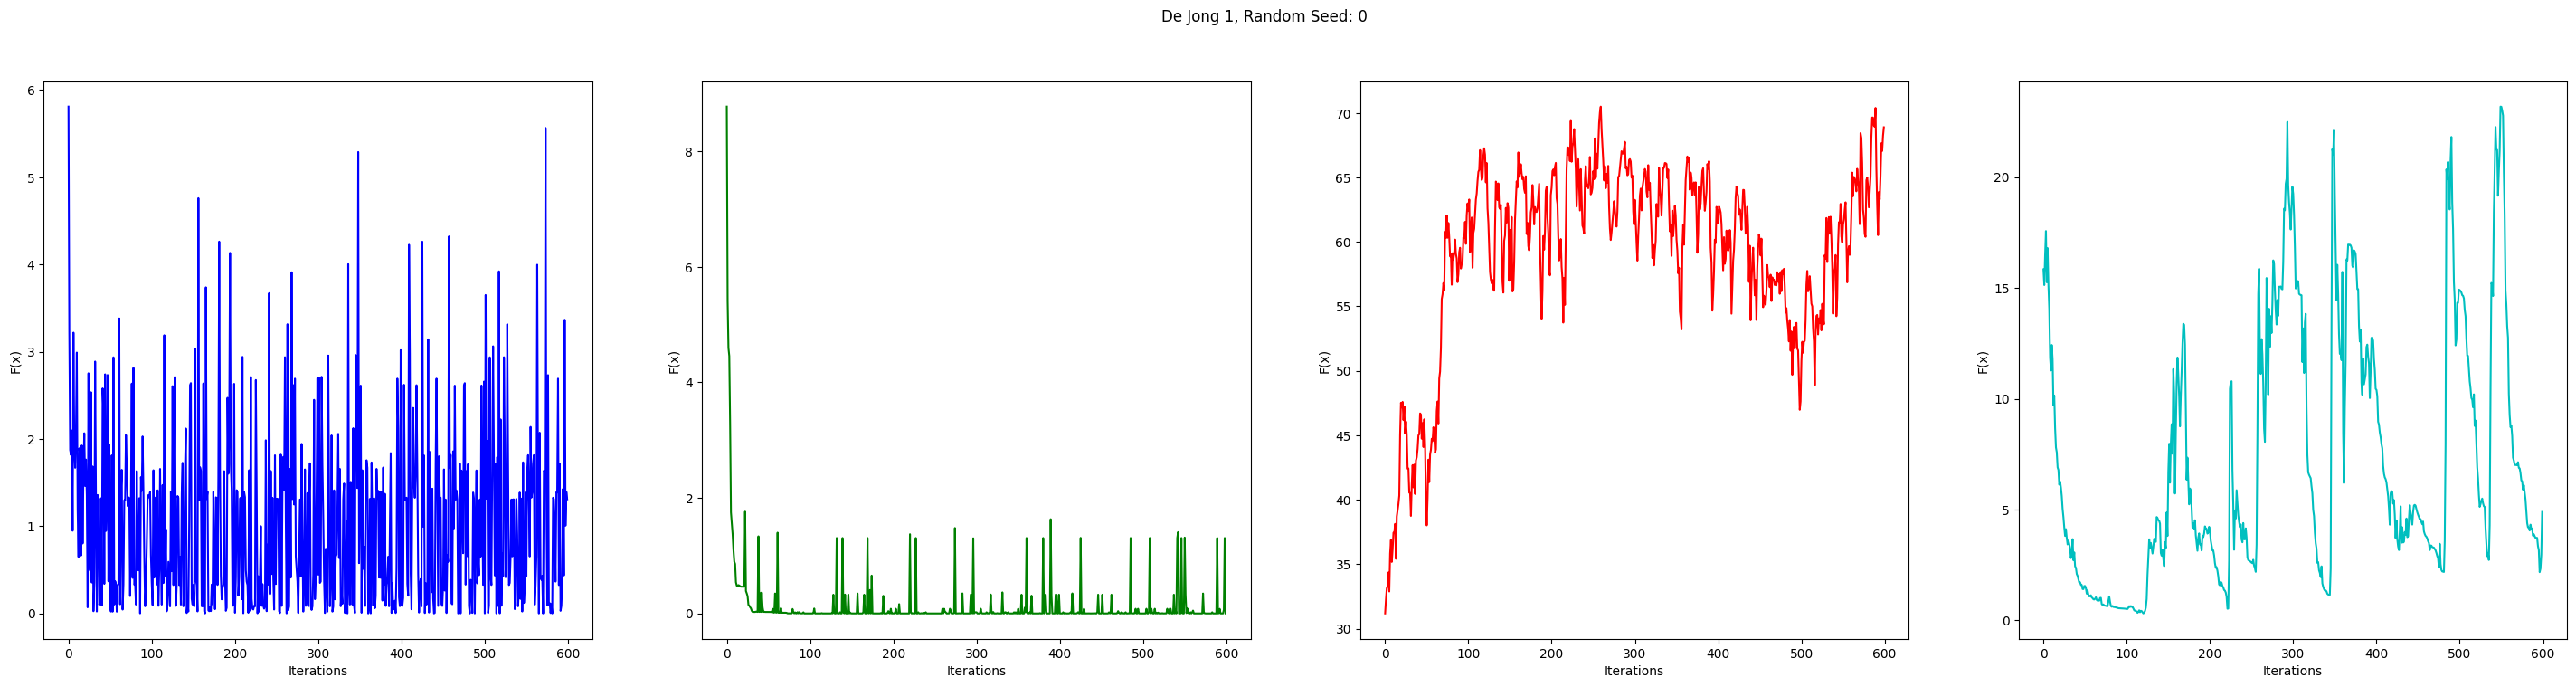

function= De Jong 1,seed = 42, sel_rule = rank, elitism = 0
function= De Jong 1,seed = 42, sel_rule = rank, elitism = 1
function= De Jong 1,seed = 42, sel_rule = roulette, elitism = 0
function= De Jong 1,seed = 42, sel_rule = roulette, elitism = 1


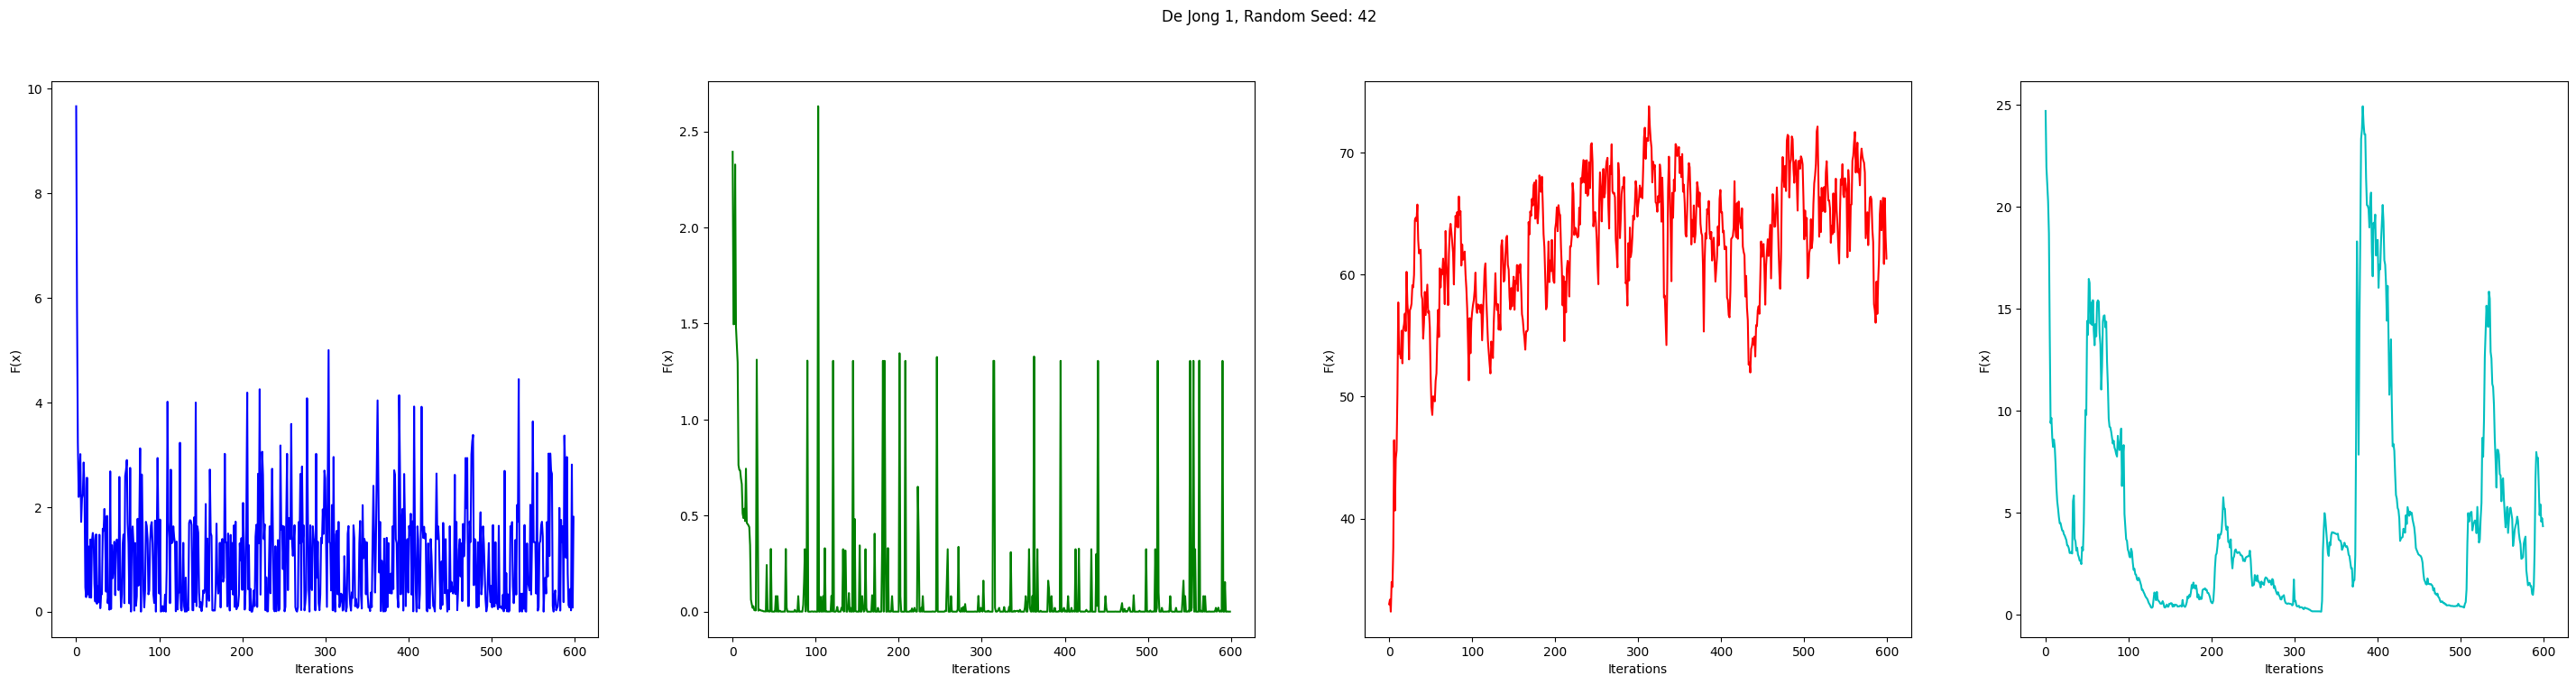

function= De Jong 1,seed = 666, sel_rule = rank, elitism = 0
function= De Jong 1,seed = 666, sel_rule = rank, elitism = 1
function= De Jong 1,seed = 666, sel_rule = roulette, elitism = 0
function= De Jong 1,seed = 666, sel_rule = roulette, elitism = 1


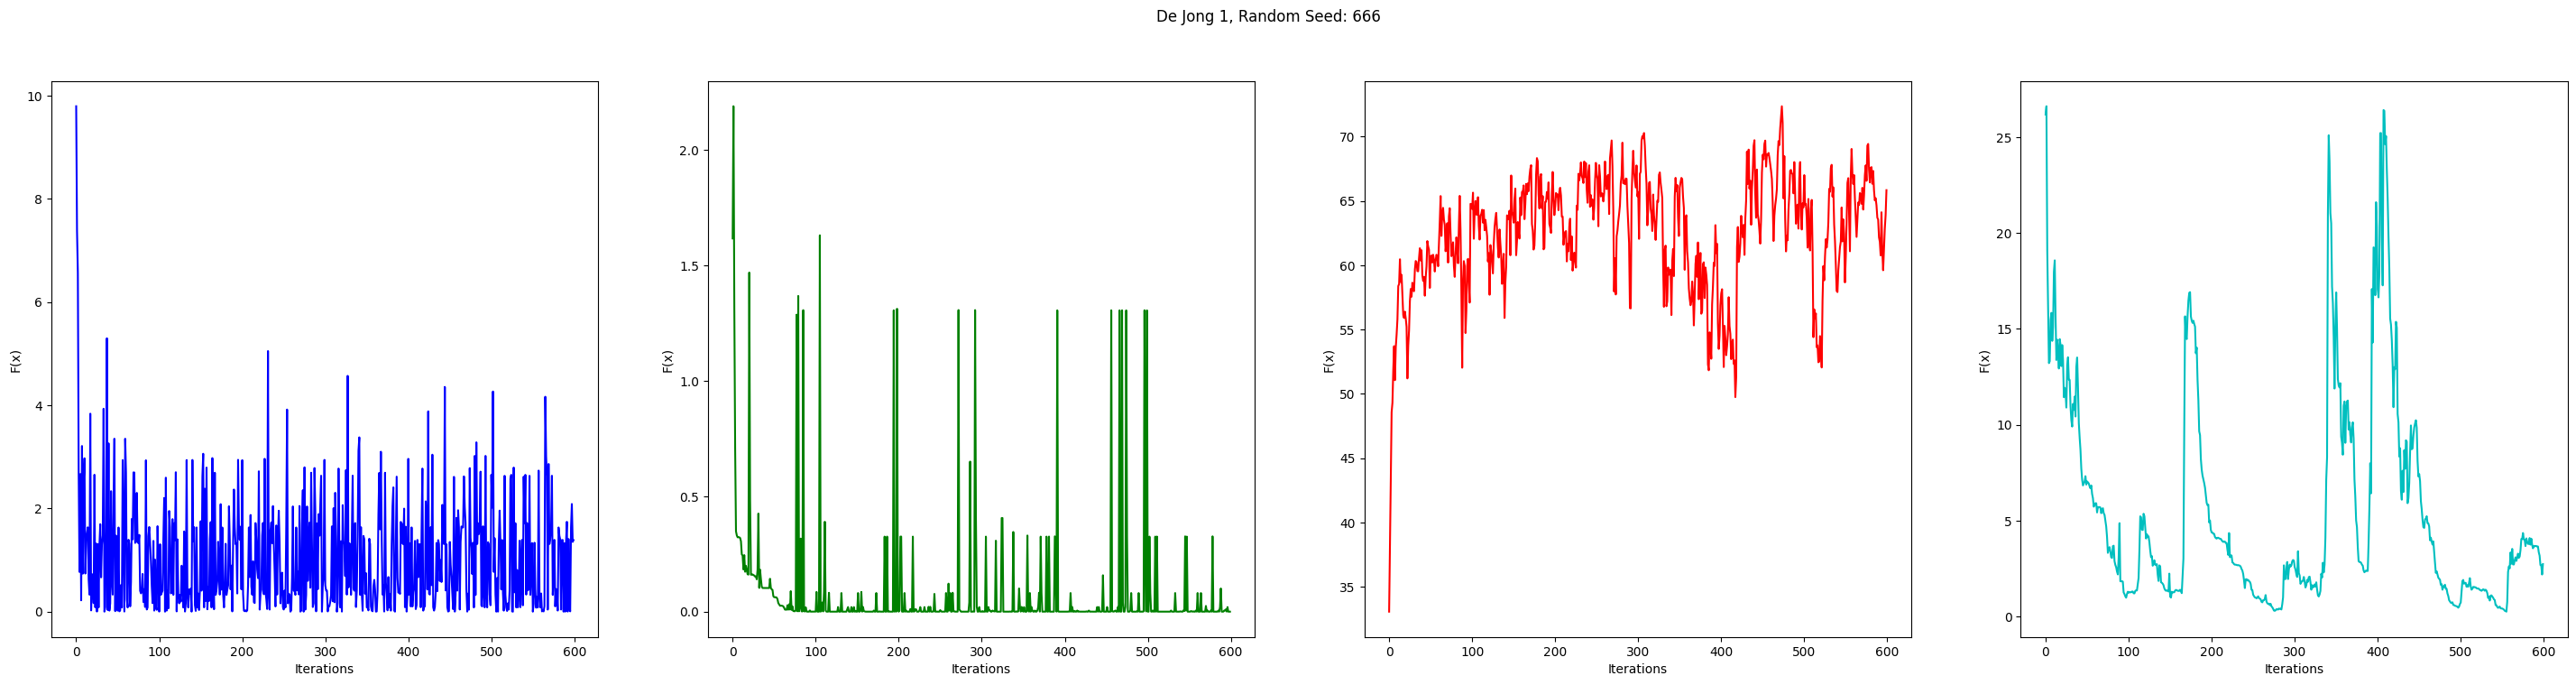

De Jong 2
function= De Jong 2,seed = 0, sel_rule = rank, elitism = 0
function= De Jong 2,seed = 0, sel_rule = rank, elitism = 1
function= De Jong 2,seed = 0, sel_rule = roulette, elitism = 0
function= De Jong 2,seed = 0, sel_rule = roulette, elitism = 1


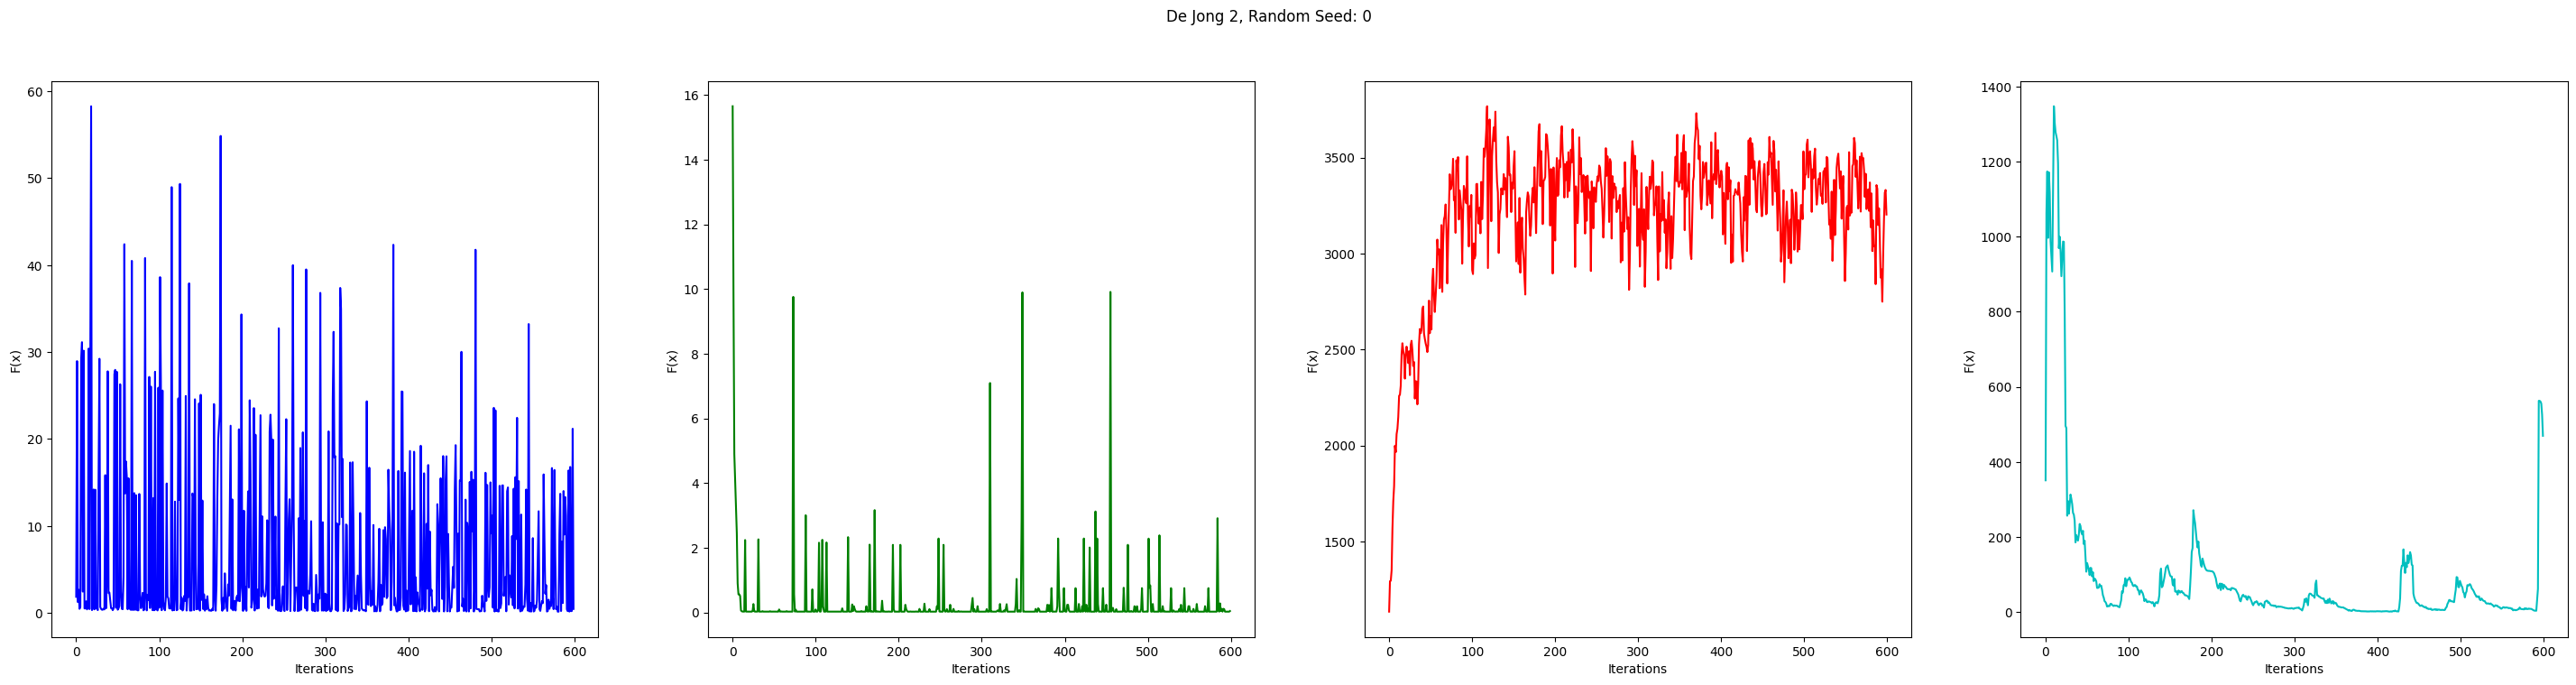

function= De Jong 2,seed = 42, sel_rule = rank, elitism = 0
function= De Jong 2,seed = 42, sel_rule = rank, elitism = 1
function= De Jong 2,seed = 42, sel_rule = roulette, elitism = 0
function= De Jong 2,seed = 42, sel_rule = roulette, elitism = 1


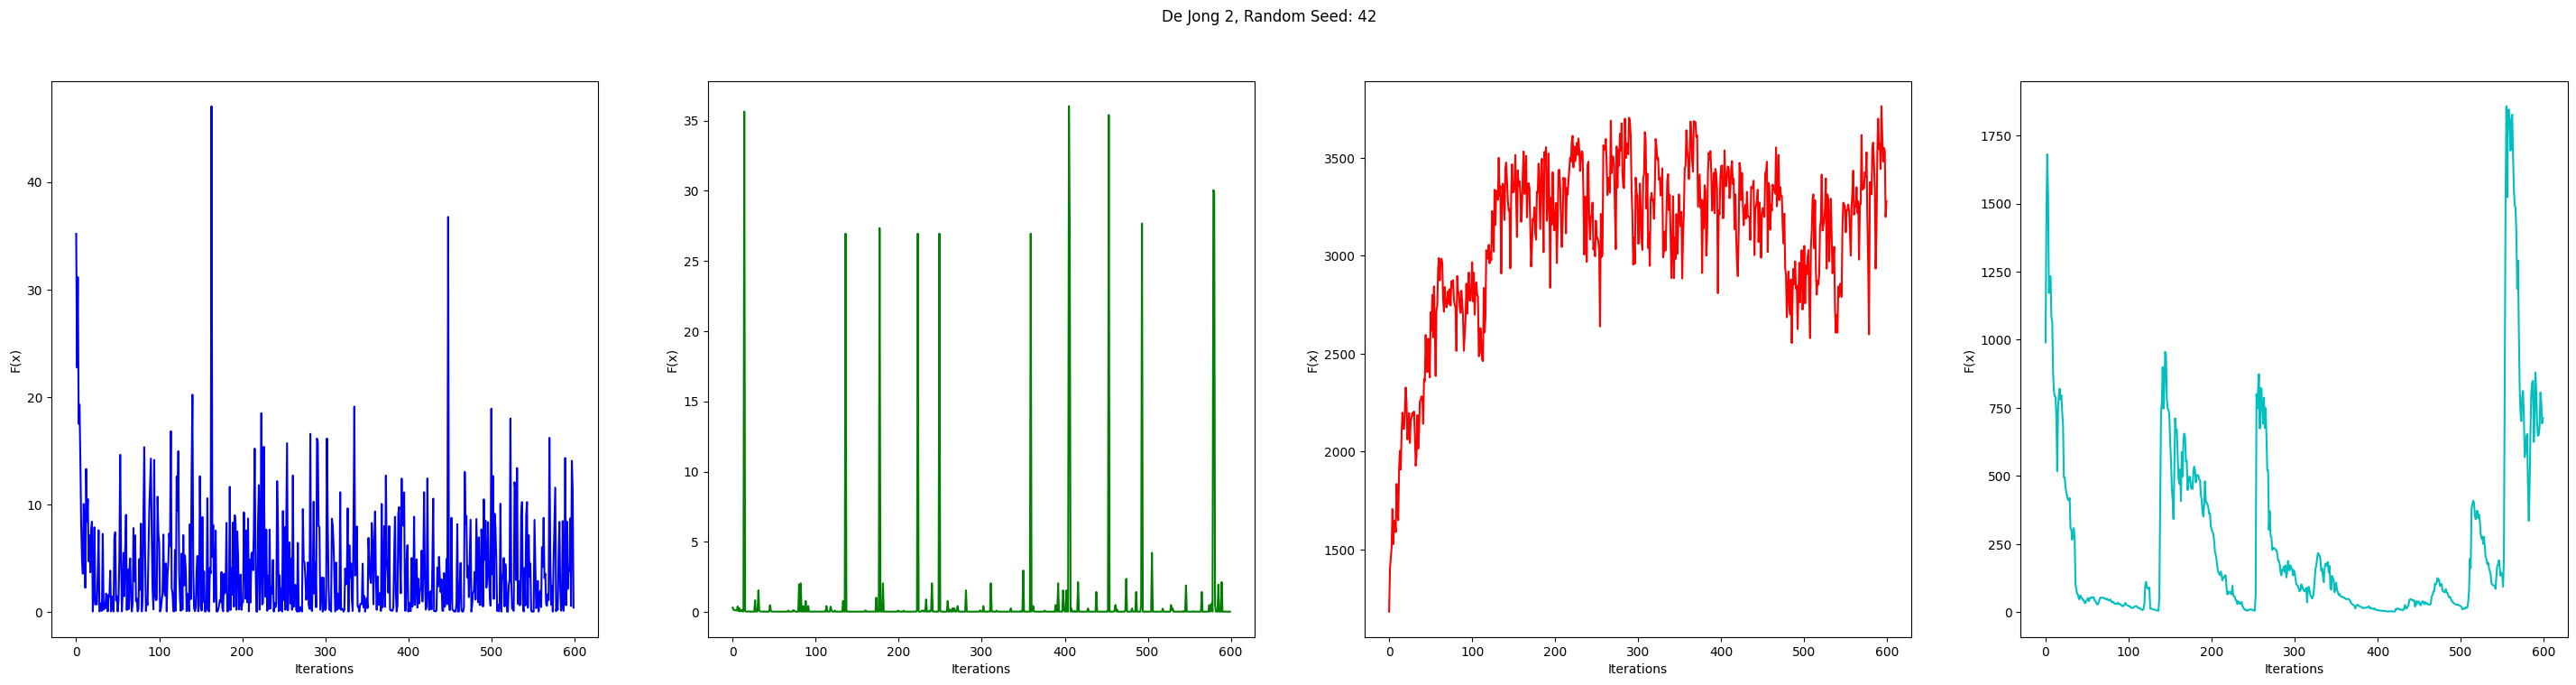

function= De Jong 2,seed = 666, sel_rule = rank, elitism = 0
function= De Jong 2,seed = 666, sel_rule = rank, elitism = 1
function= De Jong 2,seed = 666, sel_rule = roulette, elitism = 0
function= De Jong 2,seed = 666, sel_rule = roulette, elitism = 1


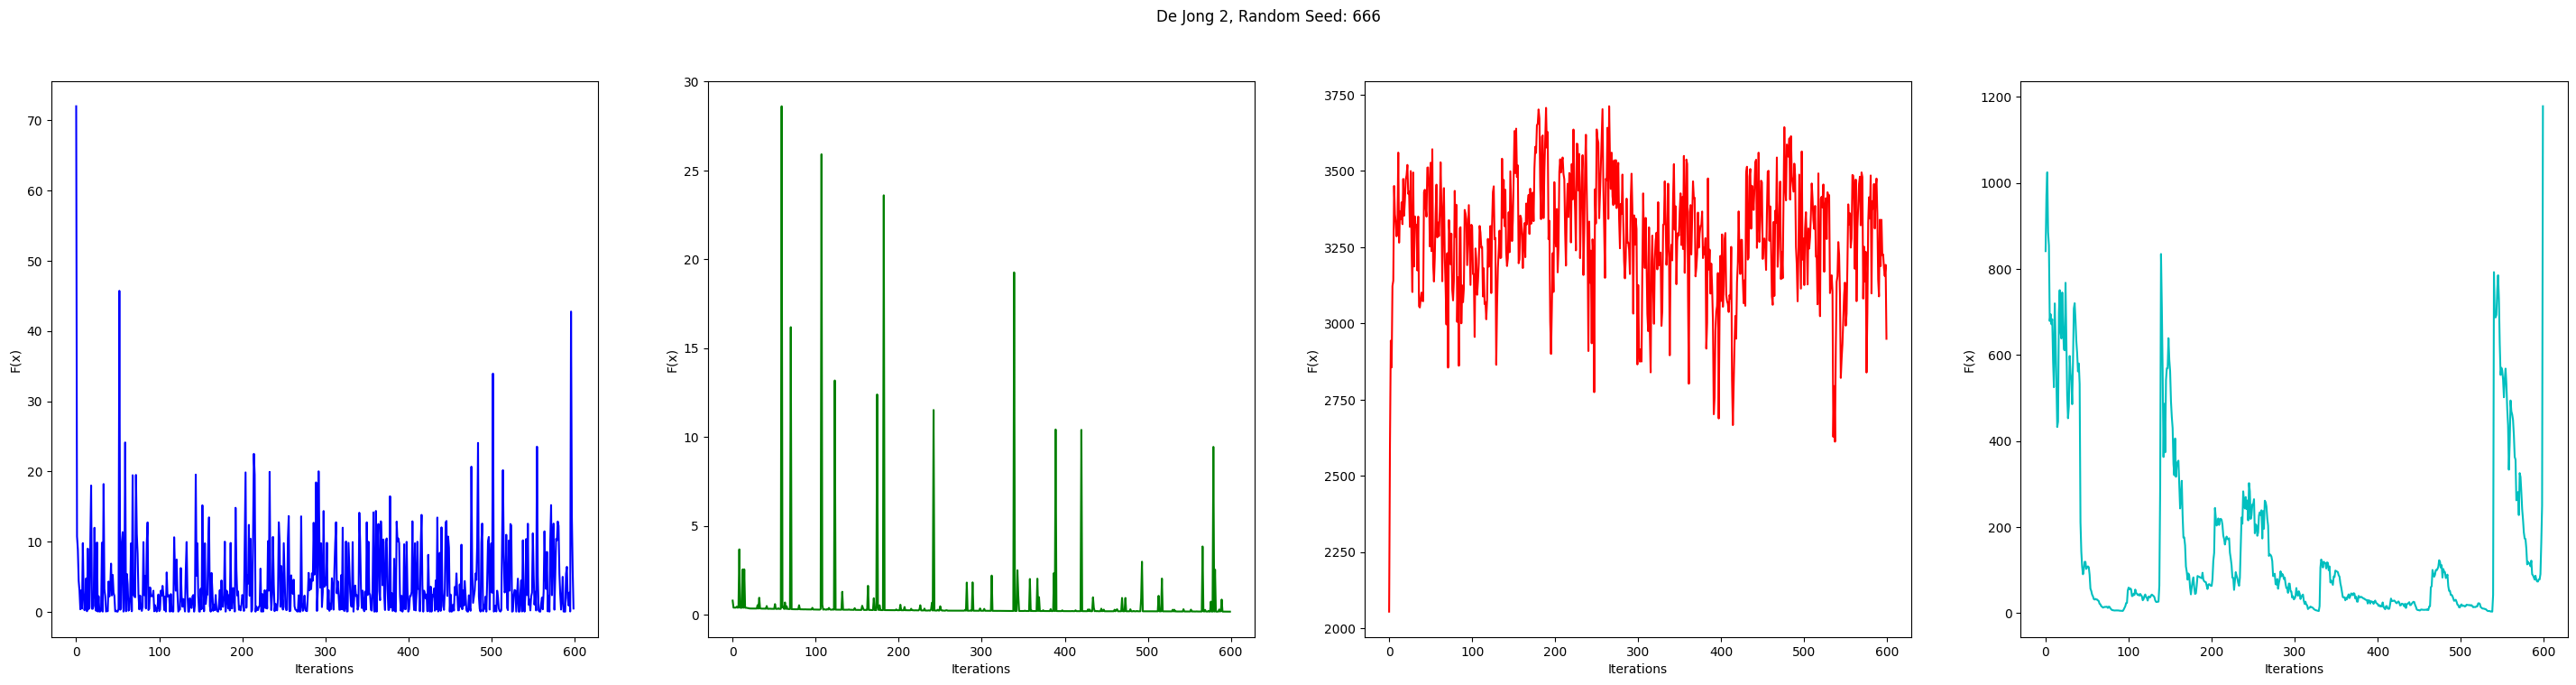

De Jong 3
function= De Jong 3,seed = 0, sel_rule = rank, elitism = 0
function= De Jong 3,seed = 0, sel_rule = rank, elitism = 1
function= De Jong 3,seed = 0, sel_rule = roulette, elitism = 0
function= De Jong 3,seed = 0, sel_rule = roulette, elitism = 1


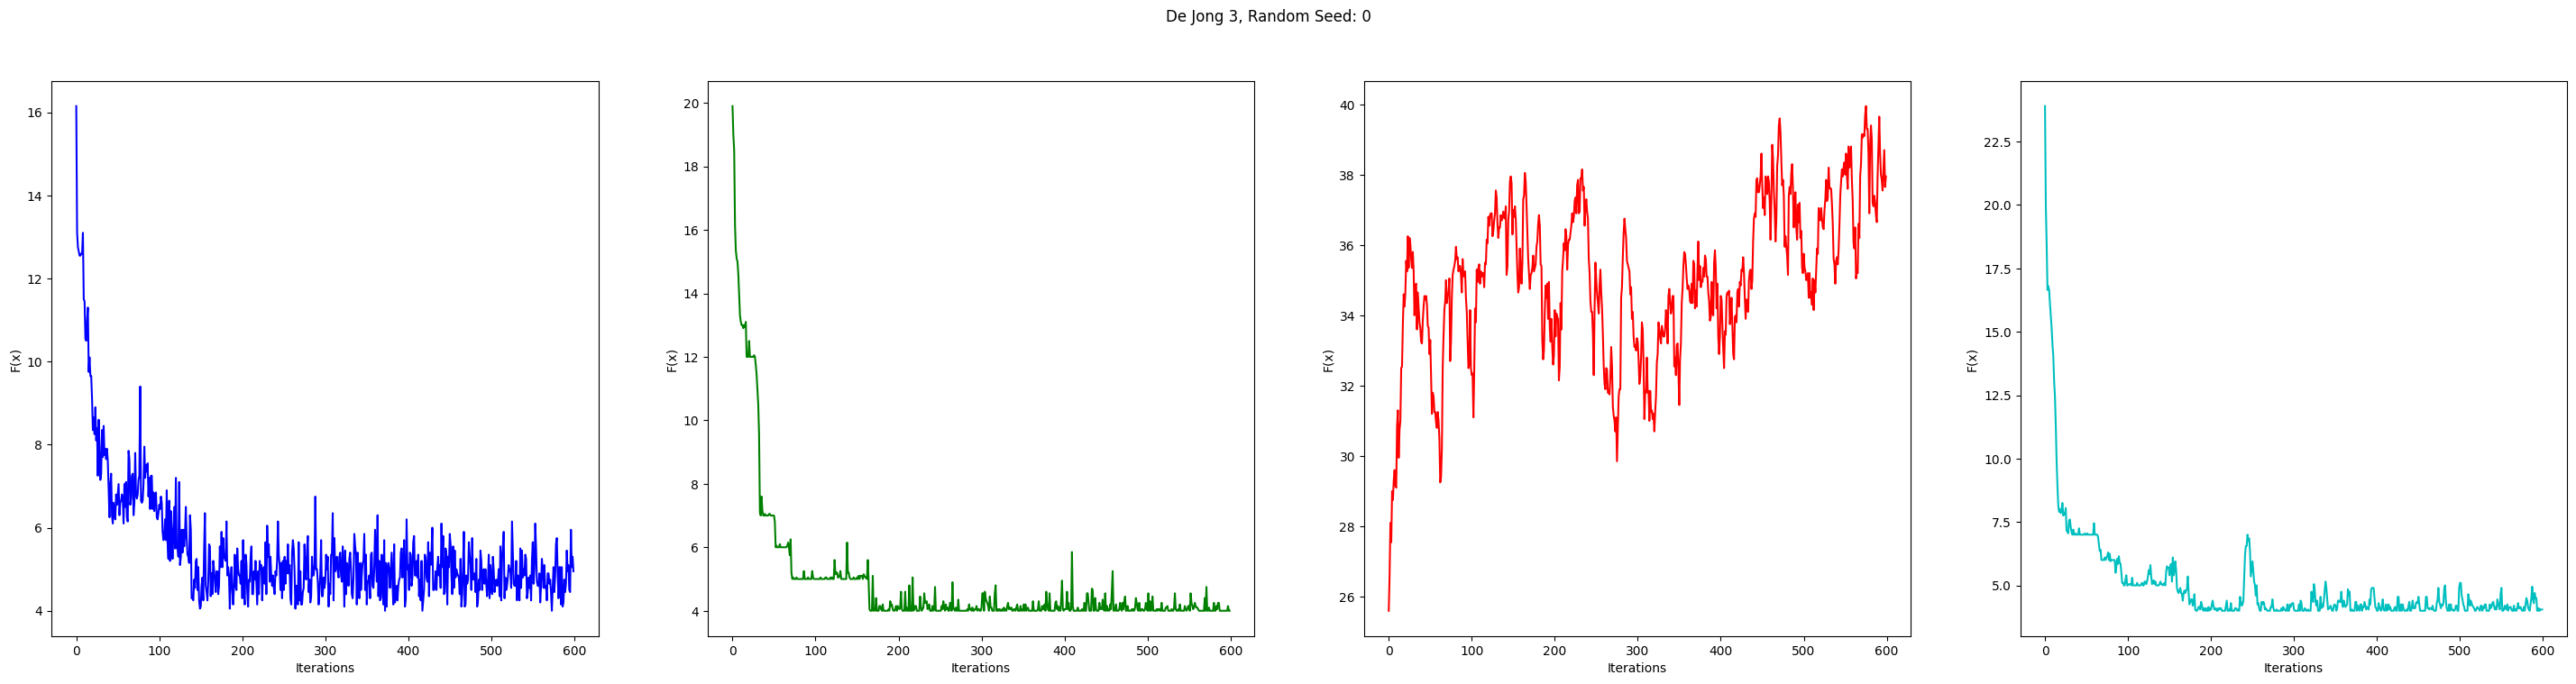

function= De Jong 3,seed = 42, sel_rule = rank, elitism = 0
function= De Jong 3,seed = 42, sel_rule = rank, elitism = 1
function= De Jong 3,seed = 42, sel_rule = roulette, elitism = 0
function= De Jong 3,seed = 42, sel_rule = roulette, elitism = 1


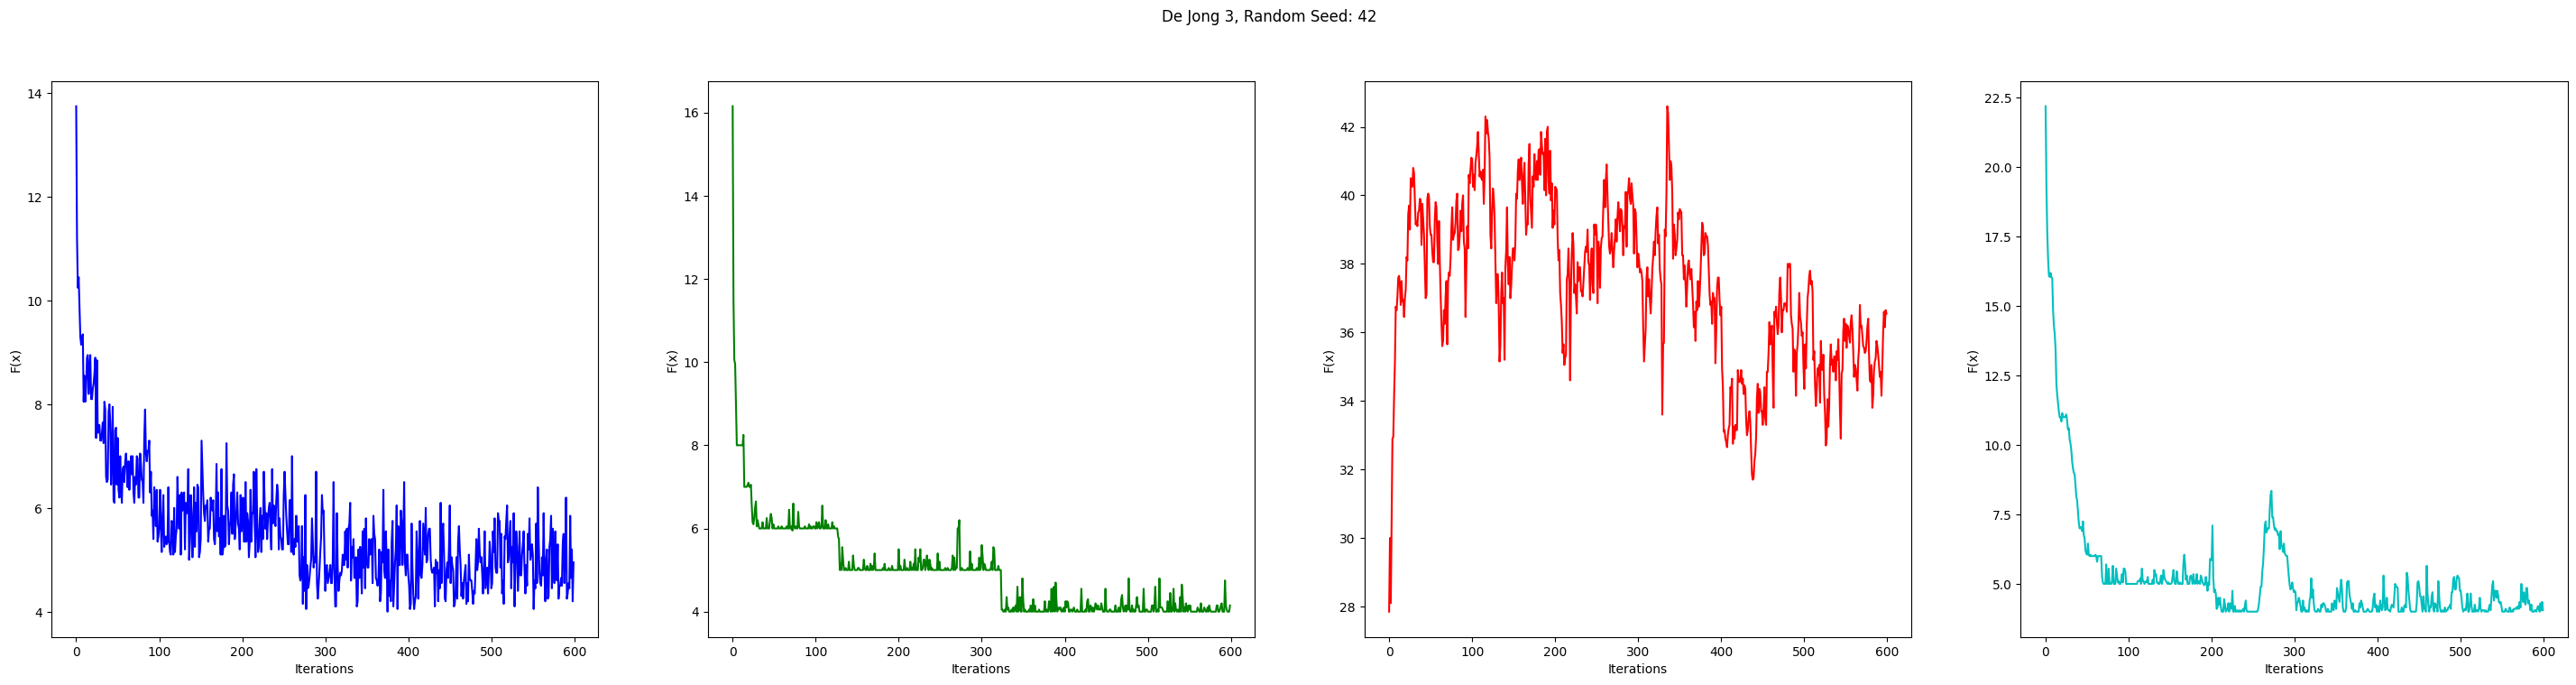

function= De Jong 3,seed = 666, sel_rule = rank, elitism = 0
function= De Jong 3,seed = 666, sel_rule = rank, elitism = 1
function= De Jong 3,seed = 666, sel_rule = roulette, elitism = 0
function= De Jong 3,seed = 666, sel_rule = roulette, elitism = 1


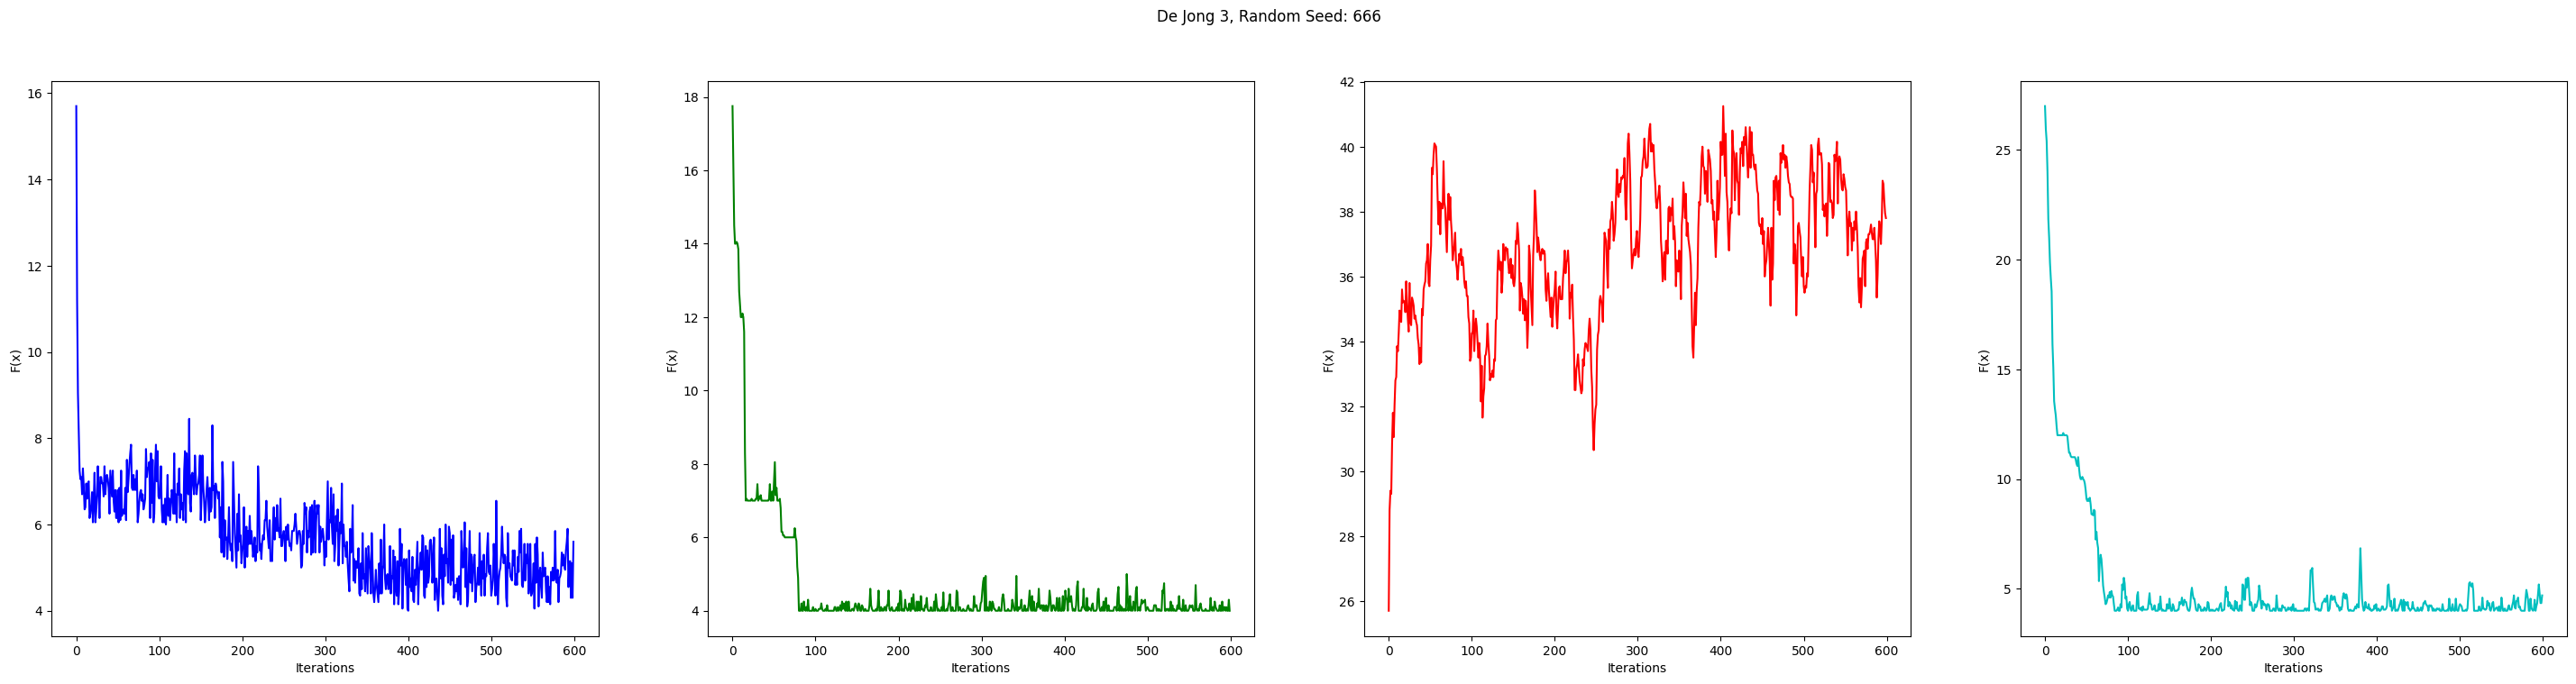

De Jong 4
function= De Jong 4,seed = 0, sel_rule = rank, elitism = 0
function= De Jong 4,seed = 0, sel_rule = rank, elitism = 1
function= De Jong 4,seed = 0, sel_rule = roulette, elitism = 0
function= De Jong 4,seed = 0, sel_rule = roulette, elitism = 1


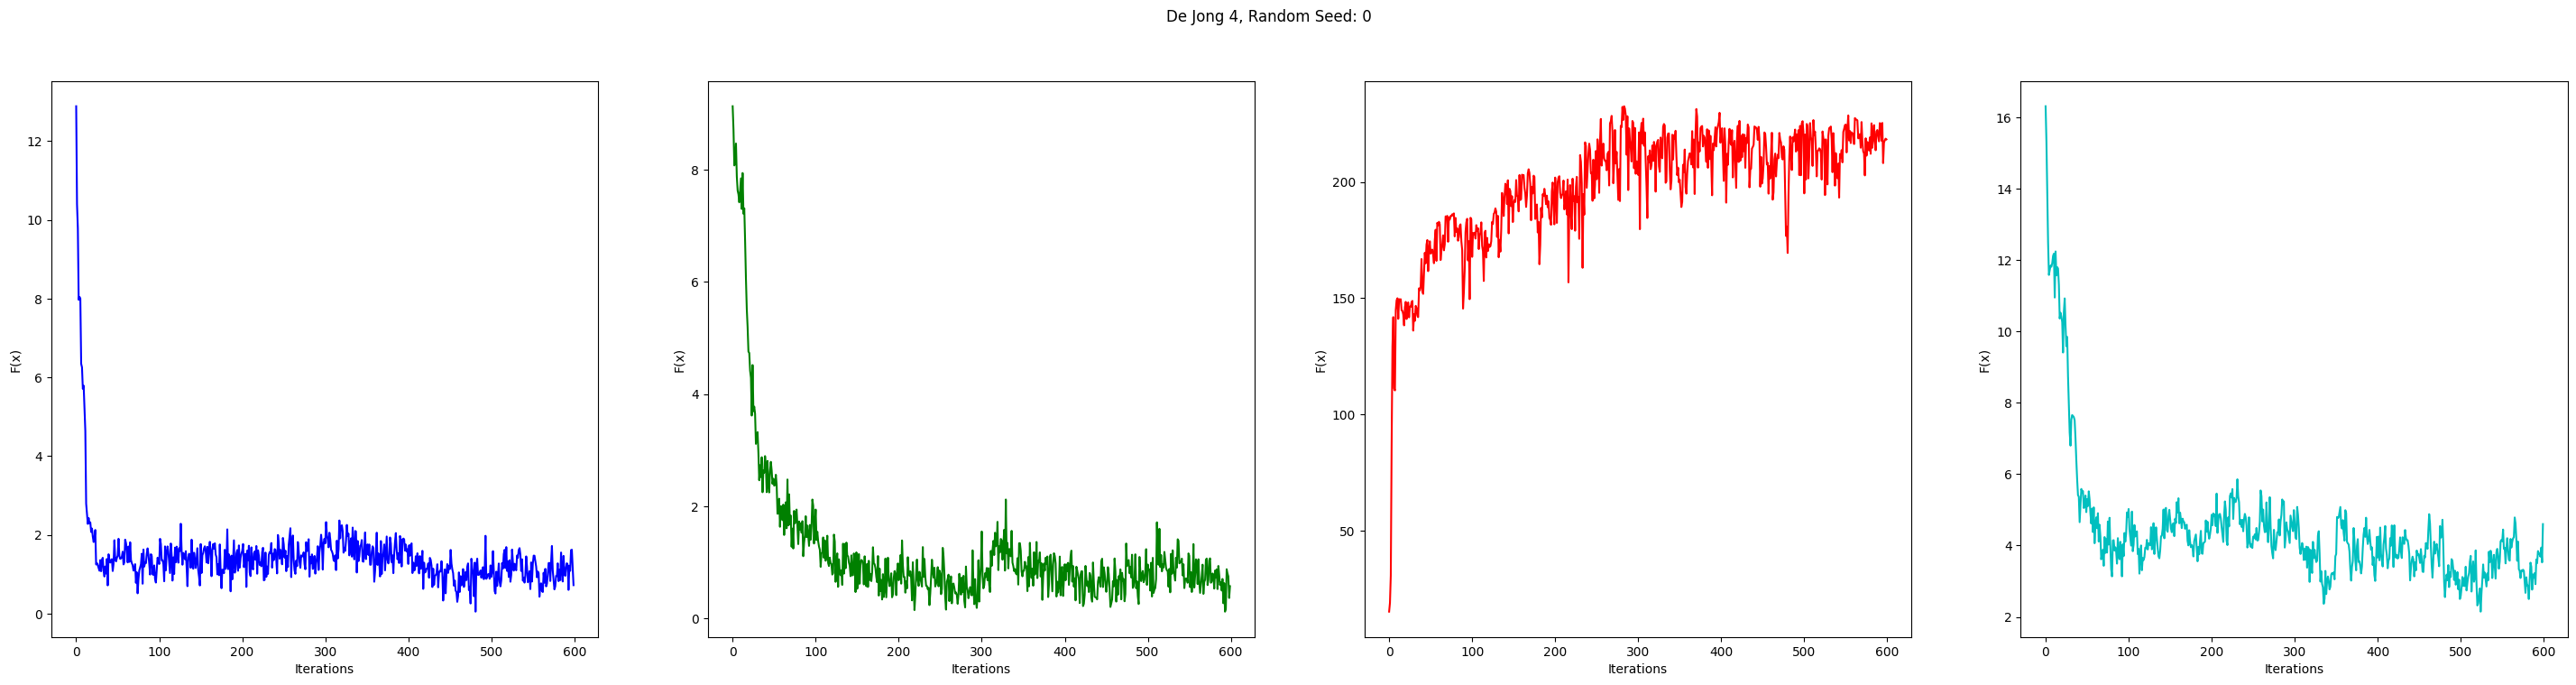

function= De Jong 4,seed = 42, sel_rule = rank, elitism = 0
function= De Jong 4,seed = 42, sel_rule = rank, elitism = 1
function= De Jong 4,seed = 42, sel_rule = roulette, elitism = 0
function= De Jong 4,seed = 42, sel_rule = roulette, elitism = 1


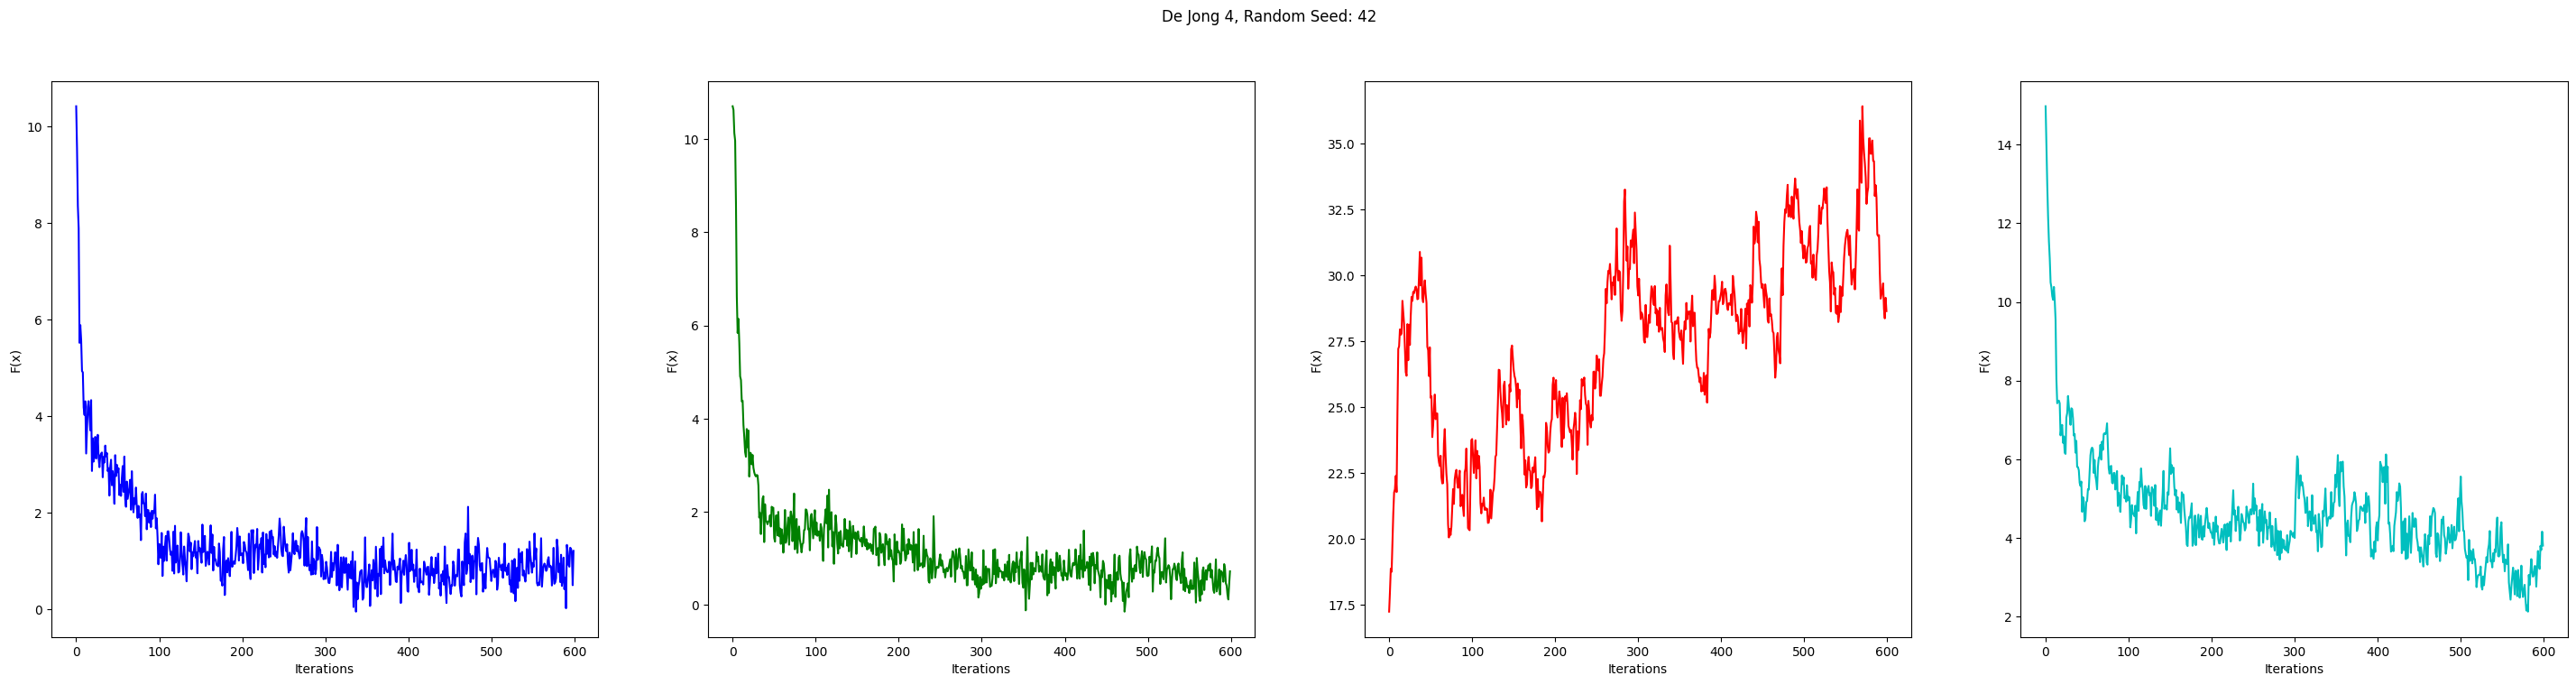

function= De Jong 4,seed = 666, sel_rule = rank, elitism = 0
function= De Jong 4,seed = 666, sel_rule = rank, elitism = 1
function= De Jong 4,seed = 666, sel_rule = roulette, elitism = 0
function= De Jong 4,seed = 666, sel_rule = roulette, elitism = 1


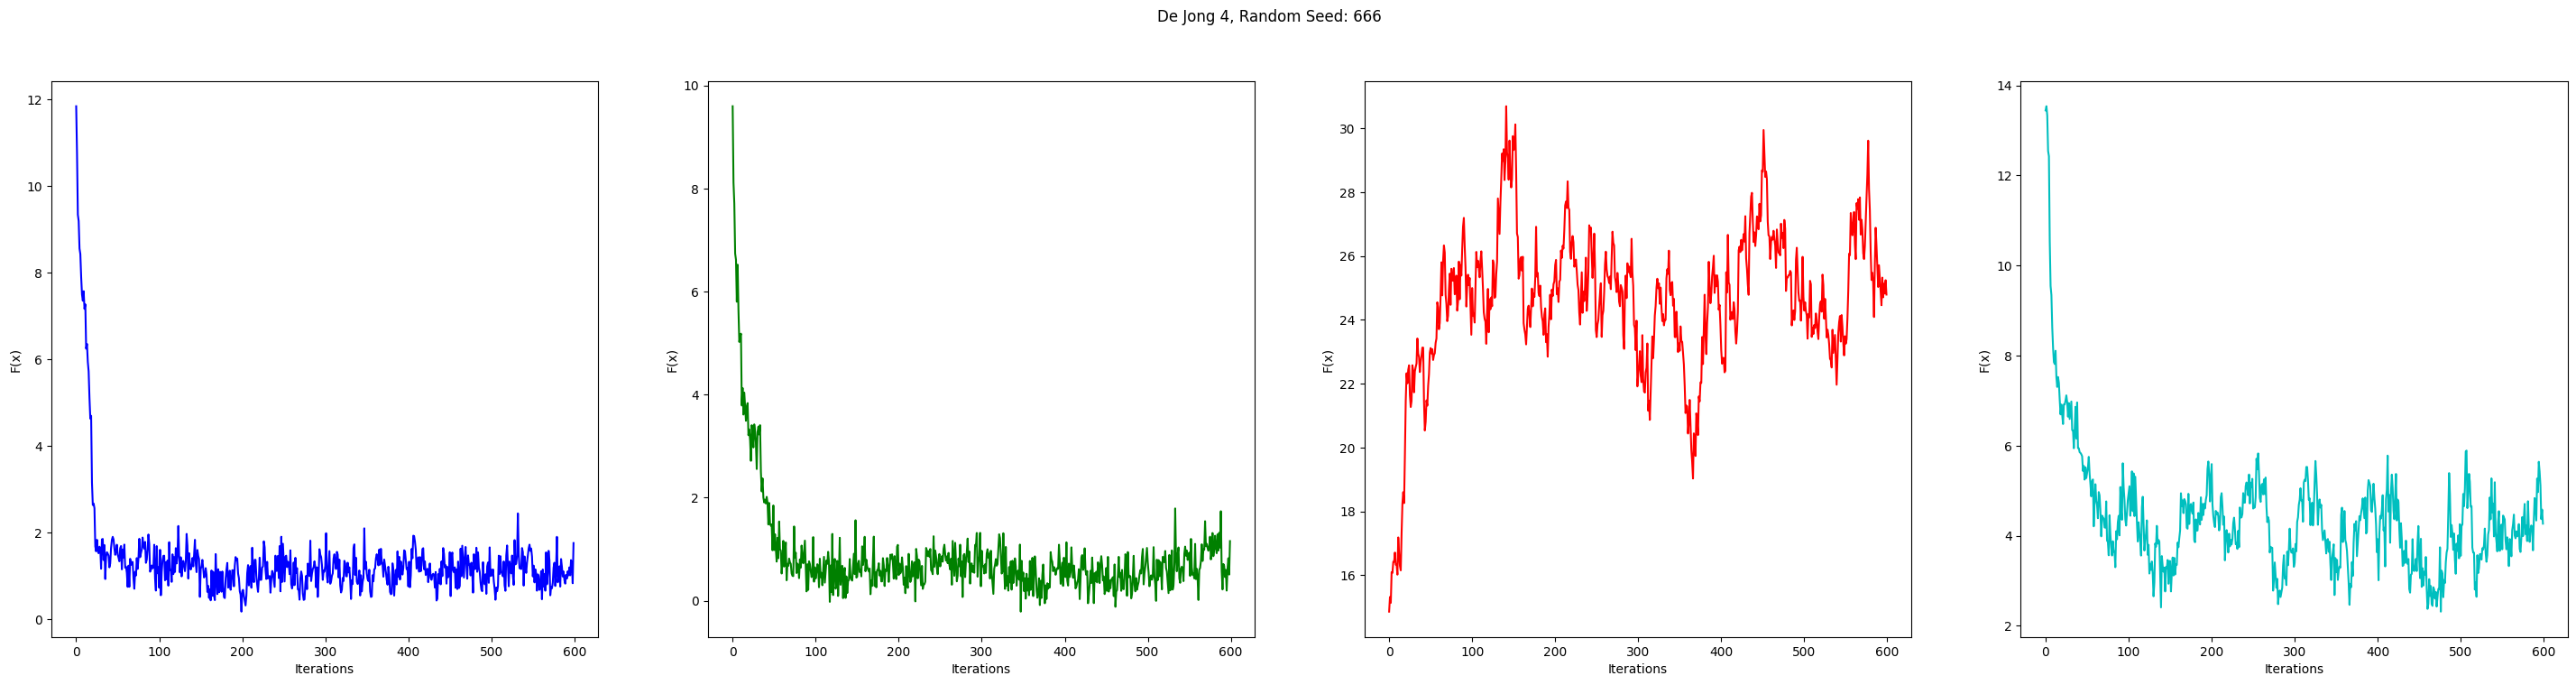

De Jong 5
function= De Jong 5,seed = 0, sel_rule = rank, elitism = 0
function= De Jong 5,seed = 0, sel_rule = rank, elitism = 1
function= De Jong 5,seed = 0, sel_rule = roulette, elitism = 0
function= De Jong 5,seed = 0, sel_rule = roulette, elitism = 1


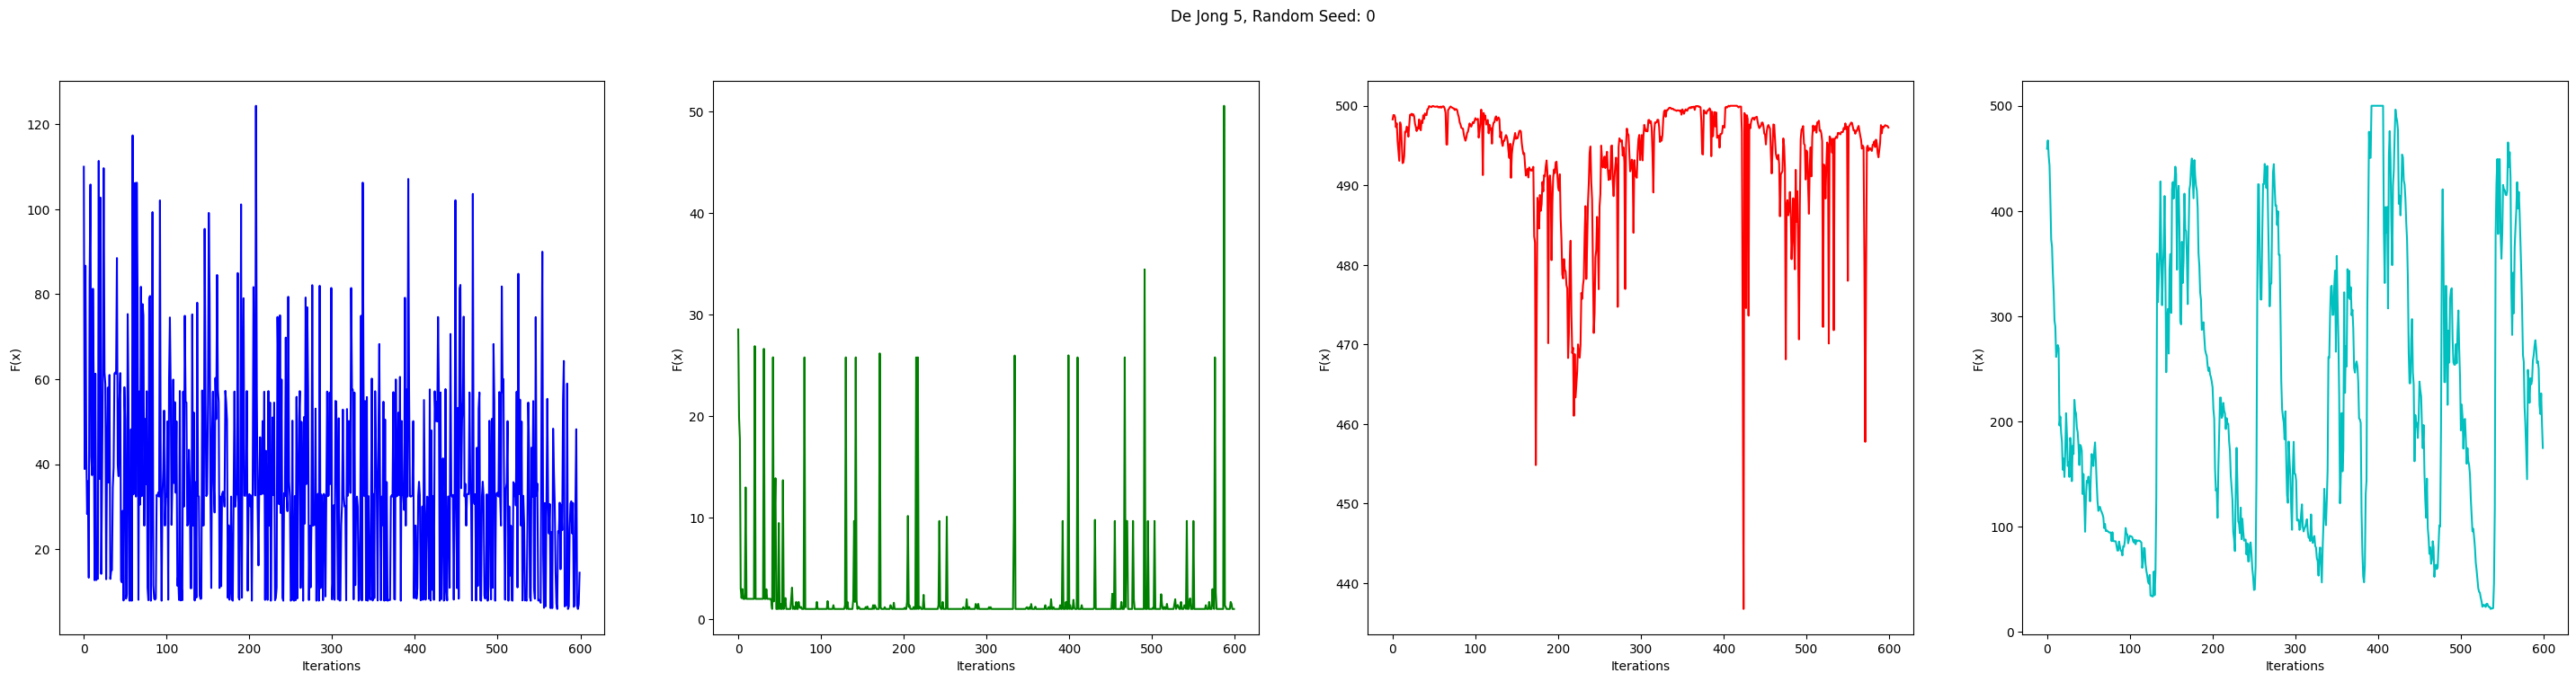

function= De Jong 5,seed = 42, sel_rule = rank, elitism = 0
function= De Jong 5,seed = 42, sel_rule = rank, elitism = 1
function= De Jong 5,seed = 42, sel_rule = roulette, elitism = 0
function= De Jong 5,seed = 42, sel_rule = roulette, elitism = 1


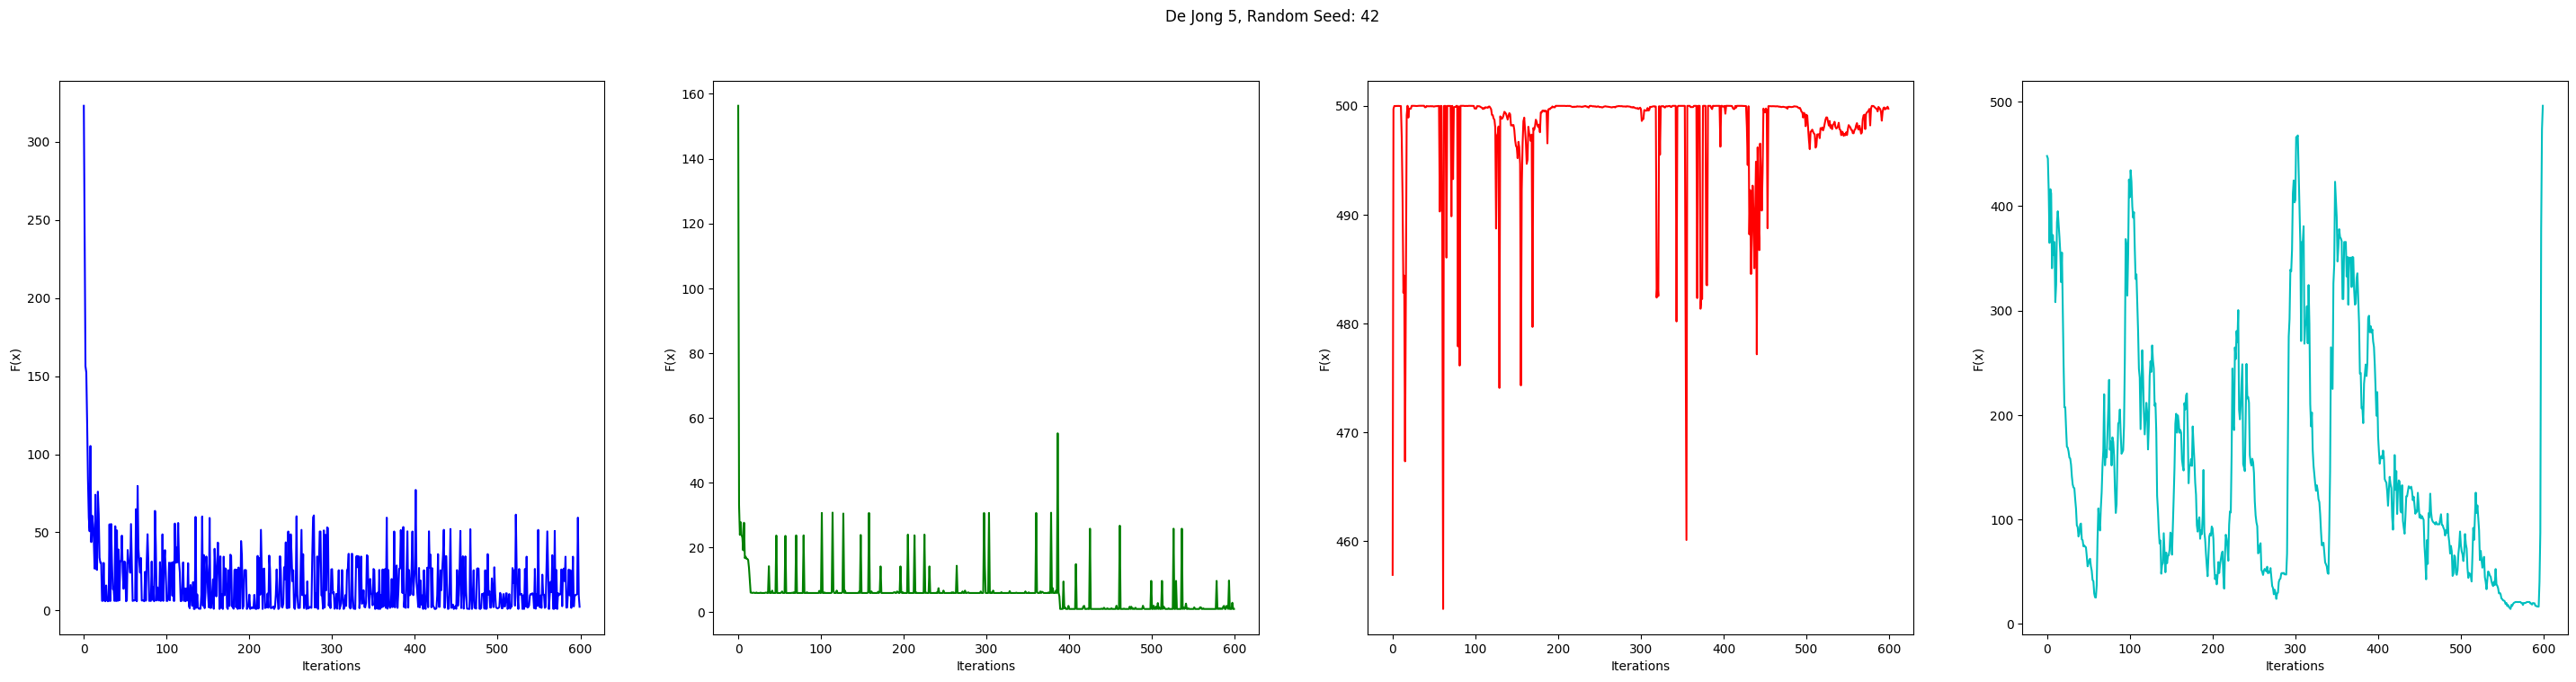

function= De Jong 5,seed = 666, sel_rule = rank, elitism = 0
function= De Jong 5,seed = 666, sel_rule = rank, elitism = 1
function= De Jong 5,seed = 666, sel_rule = roulette, elitism = 0
function= De Jong 5,seed = 666, sel_rule = roulette, elitism = 1


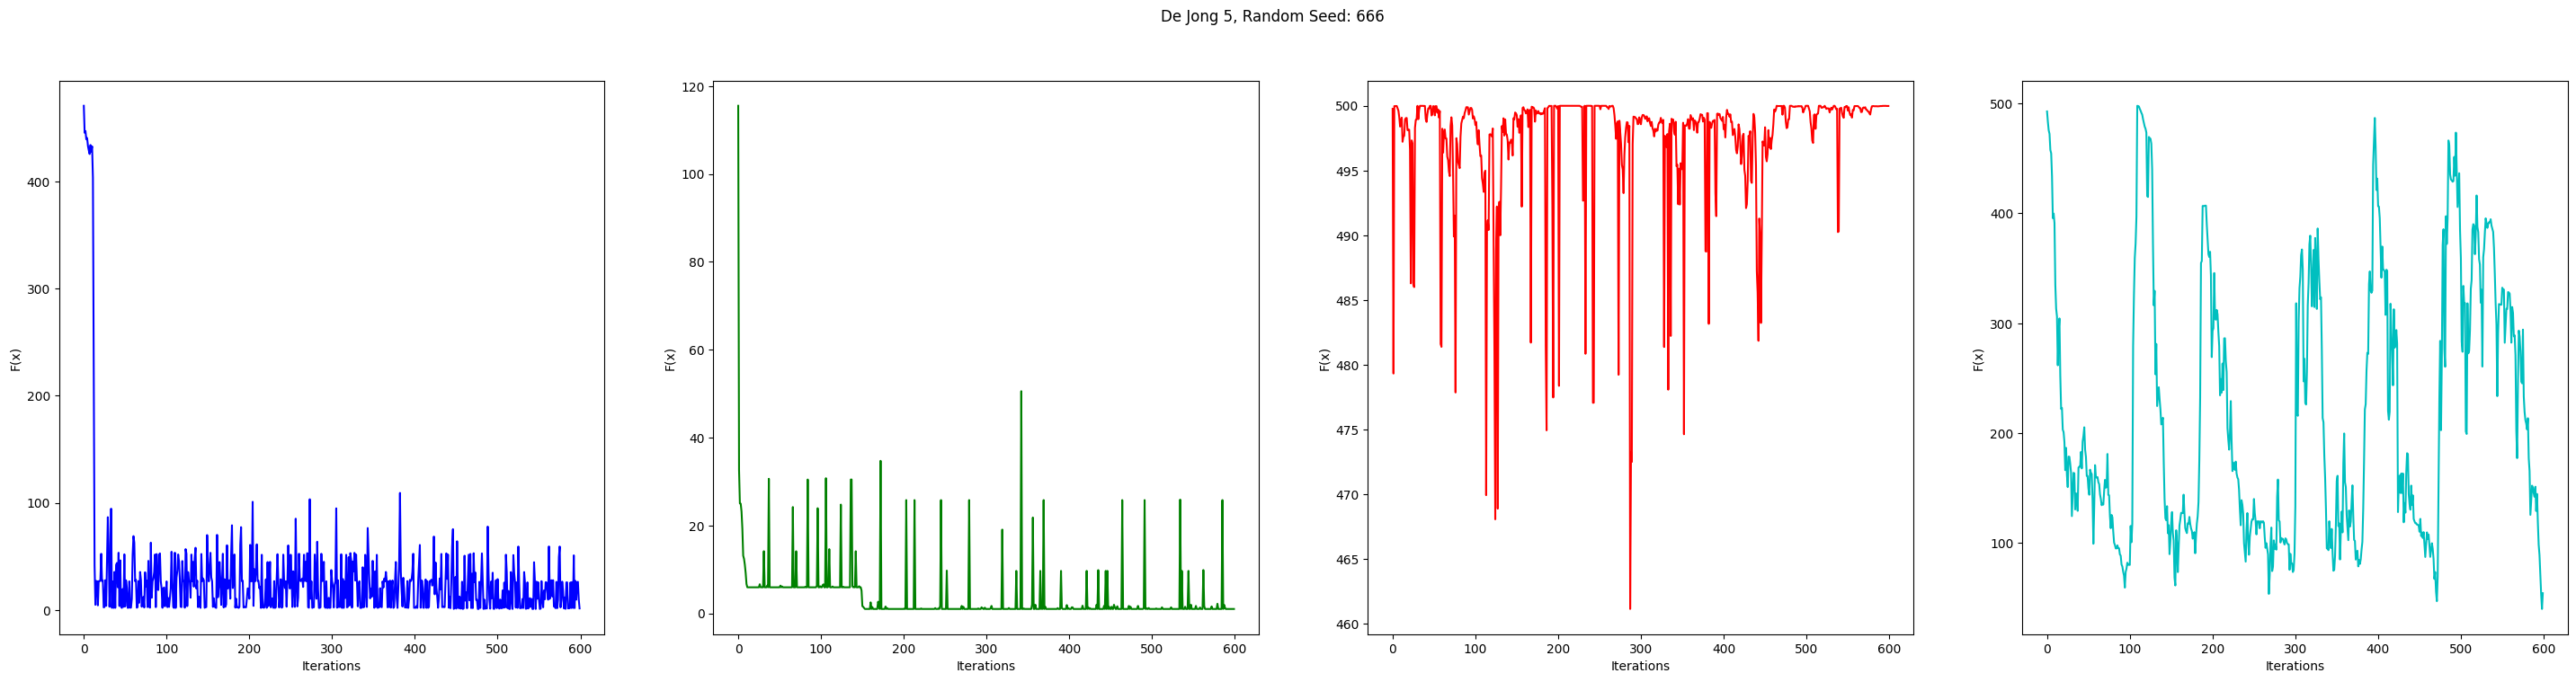

In [28]:
c_labels = ['Function', 'Method', 'Seed', 'Best solution',
            'Best fitness value', 'Best iteration']
data = []
colors = ['b', 'g', 'r', 'c']
for function in functions:
    print(function.function_name)
    # Plotting the results of the different methods for each seed.
    for seed in seeds:
        np.random.seed(seed)
        fig, axes = plt.subplots(nrows=1, ncols=len(methods), figsize=(36, 8))
        fig.suptitle(f'{function.function_name}, Random Seed: {seed}')

        # Creating a new instance of the GeneticAlgorithmForDJ class for each selection rule and elitism combination, running the
        # algorithm for each of the methods and plotting the results.
        for r_idx, sr in enumerate(selection_rules):
            for e, index in enumerate(bool_elitism):
                GA = GeneticAlgorithmForDJ(
                    dj_instance=function, selection_rule=sr, elitism=e, iterations=600)
                print(
                    f"function= {function.function_name},seed = {seed}, sel_rule = {sr}, elitism = {e}")
                GA.solve()

                # print(GA.best_solution)
                best_solution = [GA.dj_instance.gray_decode(
                    i) for i in GA.best_solution]
                #print("best solution: ", best_solution)
                #print("solution= ", GA.dj_instance.evaluate([best_solution]))
                # Plot
                # ...
                axes[r_idx*2+index].plot(list(range(0, 600)), GA.evaluations, color=colors[r_idx*2+index])
                axes[r_idx*2+index].set_xlabel("Iterations")
                axes[r_idx*2+index].set_ylabel("F(x)")
                
                # Populate dataframe
                data.append([function.function_name, sr, seed,
                            best_solution, GA.best_evaluation, GA.best_iteration])
                #df = pd.DataFrame(data, columns=c_labels)
                # print(df)
        plt.show()

df = pd.DataFrame(data, columns=c_labels)


In [29]:
# Display dataframe
df


Function    Method  Seed  \
0   De Jong 1      rank     0   
1   De Jong 1      rank     0   
2   De Jong 1  roulette     0   
3   De Jong 1  roulette     0   
4   De Jong 1      rank    42   
5   De Jong 1      rank    42   
6   De Jong 1  roulette    42   
7   De Jong 1  roulette    42   
8   De Jong 1      rank   666   
9   De Jong 1      rank   666   
10  De Jong 1  roulette   666   
11  De Jong 1  roulette   666   
12  De Jong 2      rank     0   
13  De Jong 2      rank     0   
14  De Jong 2  roulette     0   
15  De Jong 2  roulette     0   
16  De Jong 2      rank    42   
17  De Jong 2      rank    42   
18  De Jong 2  roulette    42   
19  De Jong 2  roulette    42   
20  De Jong 2      rank   666   
21  De Jong 2      rank   666   
22  De Jong 2  roulette   666   
23  De Jong 2  roulette   666   
24  De Jong 3      rank     0   
25  De Jong 3      rank     0   
26  De Jong 3  roulette     0   
27  De Jong 3  roulette     0   
28  De Jong 3      rank    42   
29  De Jong 3      rank    42   
30  De Jong 3  roulette    42   
31  De Jong 3  roulette    42   
32  De Jong 3      rank   666   
33  De Jong 3      rank   666   
34  De Jong 3  roulette   666   
35  De Jong 3  roulette   666   
36  De Jong 4      rank     0   
37  De Jong 4      rank     0   
38  De Jong 4  roulette     0   
39  De Jong 4  roulette     0   
40  De Jong 4      rank    42   
41  De Jong 4      rank    42   
42  De Jong 4  roulette    42   
43  De Jong 4  roulette    42   
44  De Jong 4      rank   666   
45  De Jong 4      rank   666   
46  De Jong 4  roulette   666   
47  De Jong 4  roulette   666   
48  De Jong 5      rank     0   
49  De Jong 5      rank     0   
50  De Jong 5  roulette     0   
51  De Jong 5  roulette     0   
52  De Jong 5      rank    42   
53  De Jong 5      rank    42   
54  De Jong 5  roulette    42   
55  De Jong 5  roulette    42   
56  De Jong 5      rank   666   
57  De Jong 5      rank   666   
58  De Jong 5  roulette   666   
59  De Jong 5  roulette   666   

                                        Best solution  Best fitness value  \
0                                    [0.0, 0.0, 0.01]            0.000000   
1                                    [0.0, 0.0, 0.04]            0.000000   
2                                  [2.42, 0.67, 2.68]            0.000000   
3                                  [0.23, 2.74, 0.62]            0.000000   
4                                   [0.04, 0.0, 0.01]            0.000000   
5                                    [0.0, 0.0, 0.01]            0.000000   
6                                [-0.84, -0.4, -3.14]            0.000000   
7                                [-1.88, 1.37, -0.85]            0.000000   
8                                    [0.01, 0.0, 0.0]            0.000000   
9                                     [0.0, 0.0, 0.0]            0.000000   
10                                [4.81, -4.28, 0.53]            0.000000   
11                                 [1.03, -0.15, 2.1]            0.000000   
12                                      [0.63, 0.394]            0.137741   
13                                     [0.838, 0.702]            0.000000   
14                                   [-1.857, -1.071]            0.000000   
15                                    [-1.489, 0.613]            0.000000   
16                                     [0.806, 0.649]            0.000000   
17                                     [1.153, 1.329]            0.000000   
18                                    [1.576, -1.345]            0.000000   
19                                    [0.191, -0.301]            0.000000   
20                                     [0.844, 0.712]            0.000000   
21                                     [0.591, 0.347]            0.000000   
22                                    [0.042, -1.833]            0.000000   
23                                   [-0.578, -1.096]            0.000000   
24                        [-5.07, -5.1, -5.02, -5.04]            0

#### Plot averaged on seeds

function= De Jong 1,seed = 0, sel_rule = rank, elitism = False
function= De Jong 1,seed = 42, sel_rule = rank, elitism = False
function= De Jong 1,seed = 666, sel_rule = rank, elitism = False
function= De Jong 1,seed = 0, sel_rule = rank, elitism = True
function= De Jong 1,seed = 42, sel_rule = rank, elitism = True
function= De Jong 1,seed = 666, sel_rule = rank, elitism = True
function= De Jong 1,seed = 0, sel_rule = roulette, elitism = False
function= De Jong 1,seed = 42, sel_rule = roulette, elitism = False
function= De Jong 1,seed = 666, sel_rule = roulette, elitism = False
function= De Jong 1,seed = 0, sel_rule = roulette, elitism = True
function= De Jong 1,seed = 42, sel_rule = roulette, elitism = True
function= De Jong 1,seed = 666, sel_rule = roulette, elitism = True


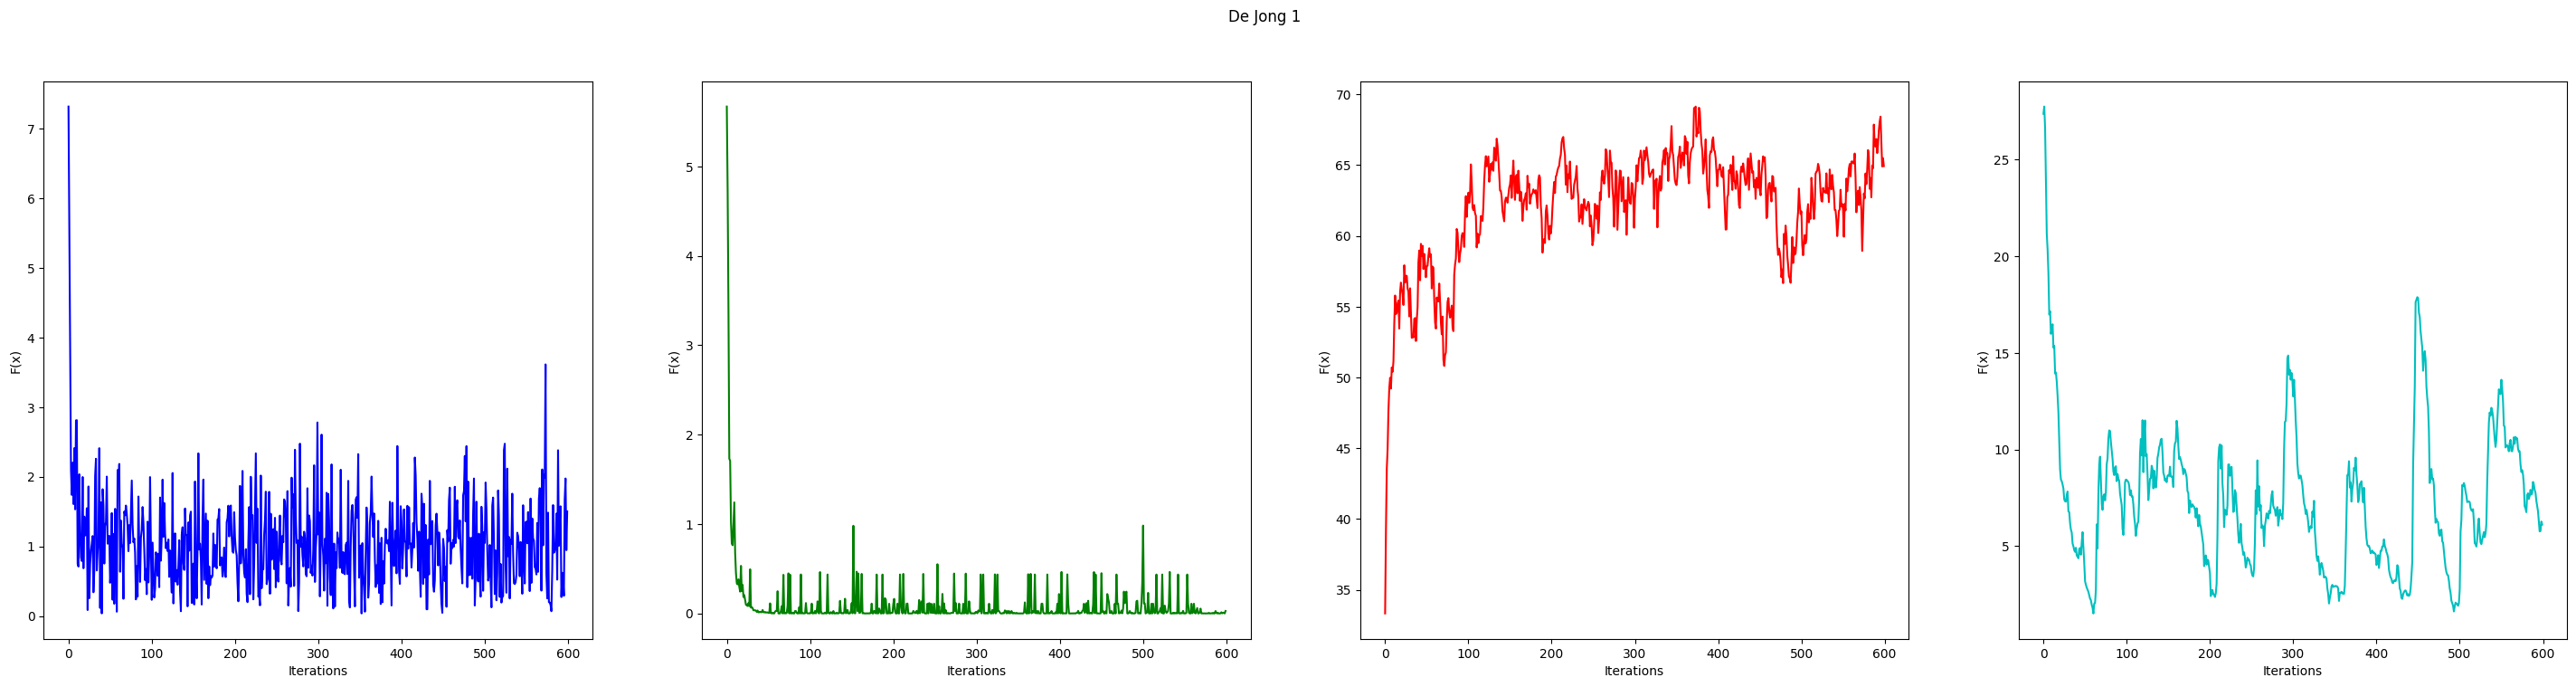

function= De Jong 2,seed = 0, sel_rule = rank, elitism = False
function= De Jong 2,seed = 42, sel_rule = rank, elitism = False
function= De Jong 2,seed = 666, sel_rule = rank, elitism = False
function= De Jong 2,seed = 0, sel_rule = rank, elitism = True
function= De Jong 2,seed = 42, sel_rule = rank, elitism = True
function= De Jong 2,seed = 666, sel_rule = rank, elitism = True
function= De Jong 2,seed = 0, sel_rule = roulette, elitism = False
function= De Jong 2,seed = 42, sel_rule = roulette, elitism = False
function= De Jong 2,seed = 666, sel_rule = roulette, elitism = False
function= De Jong 2,seed = 0, sel_rule = roulette, elitism = True
function= De Jong 2,seed = 42, sel_rule = roulette, elitism = True
function= De Jong 2,seed = 666, sel_rule = roulette, elitism = True


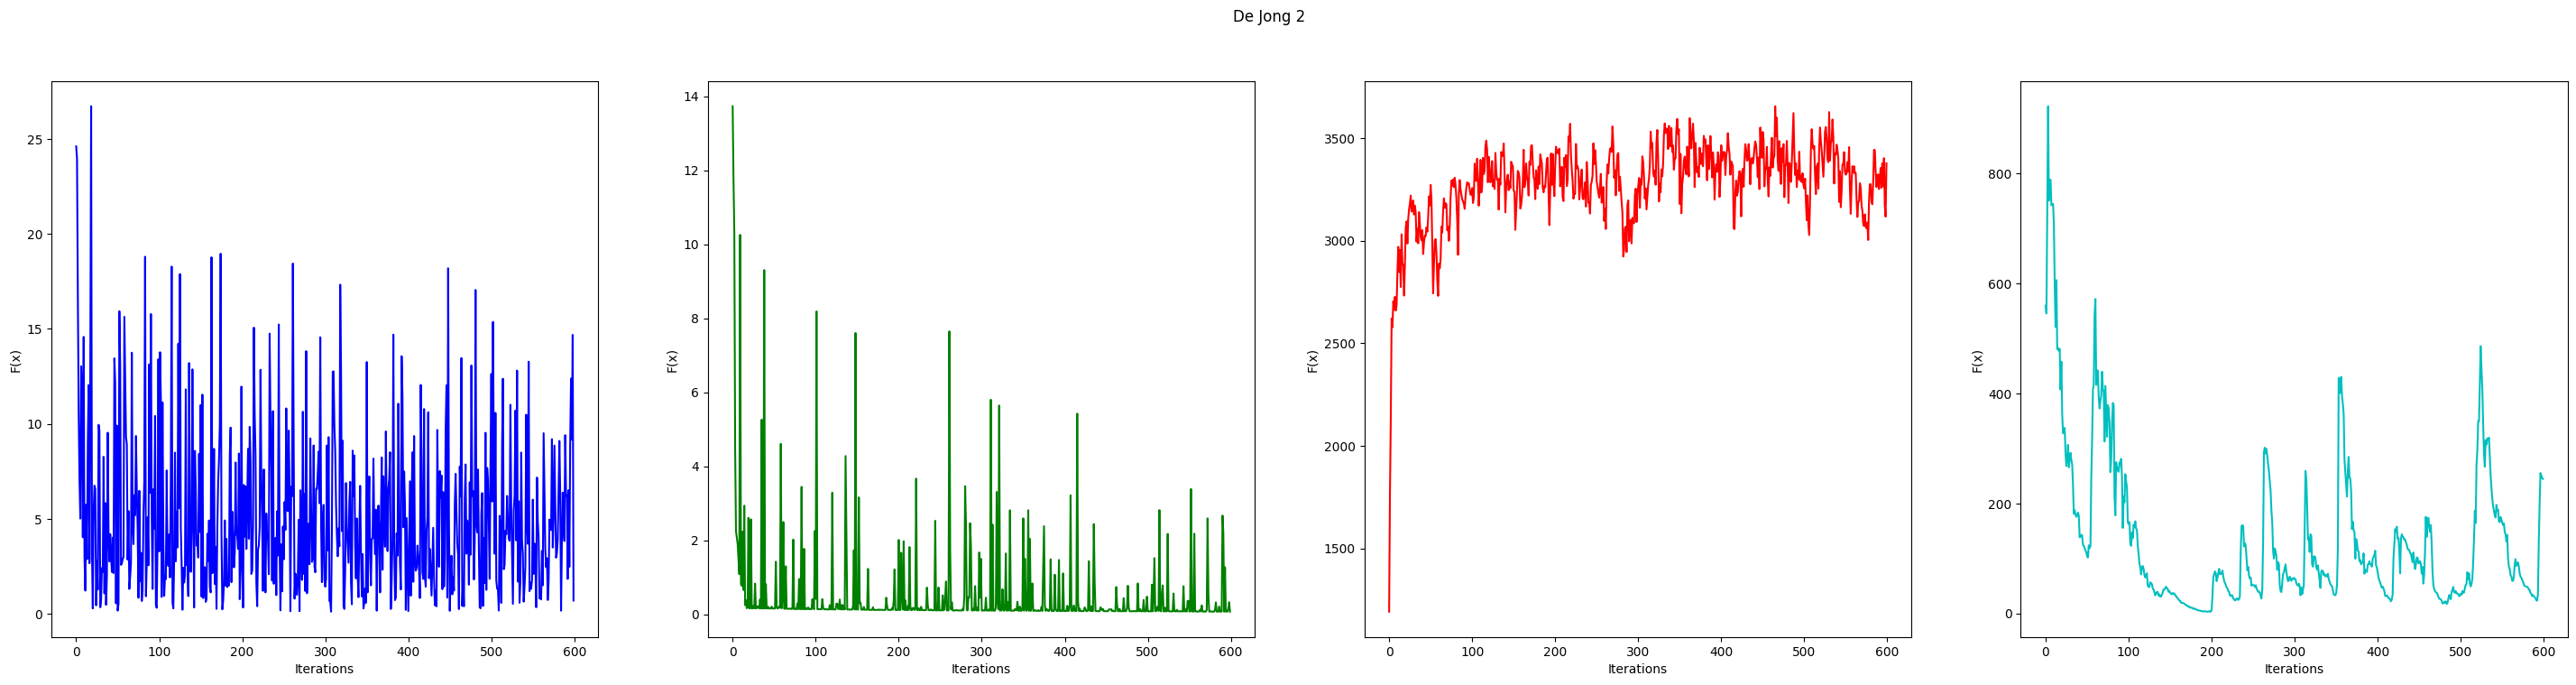

function= De Jong 3,seed = 0, sel_rule = rank, elitism = False
function= De Jong 3,seed = 42, sel_rule = rank, elitism = False
function= De Jong 3,seed = 666, sel_rule = rank, elitism = False
function= De Jong 3,seed = 0, sel_rule = rank, elitism = True
function= De Jong 3,seed = 42, sel_rule = rank, elitism = True
function= De Jong 3,seed = 666, sel_rule = rank, elitism = True
function= De Jong 3,seed = 0, sel_rule = roulette, elitism = False
function= De Jong 3,seed = 42, sel_rule = roulette, elitism = False
function= De Jong 3,seed = 666, sel_rule = roulette, elitism = False
function= De Jong 3,seed = 0, sel_rule = roulette, elitism = True
function= De Jong 3,seed = 42, sel_rule = roulette, elitism = True
function= De Jong 3,seed = 666, sel_rule = roulette, elitism = True


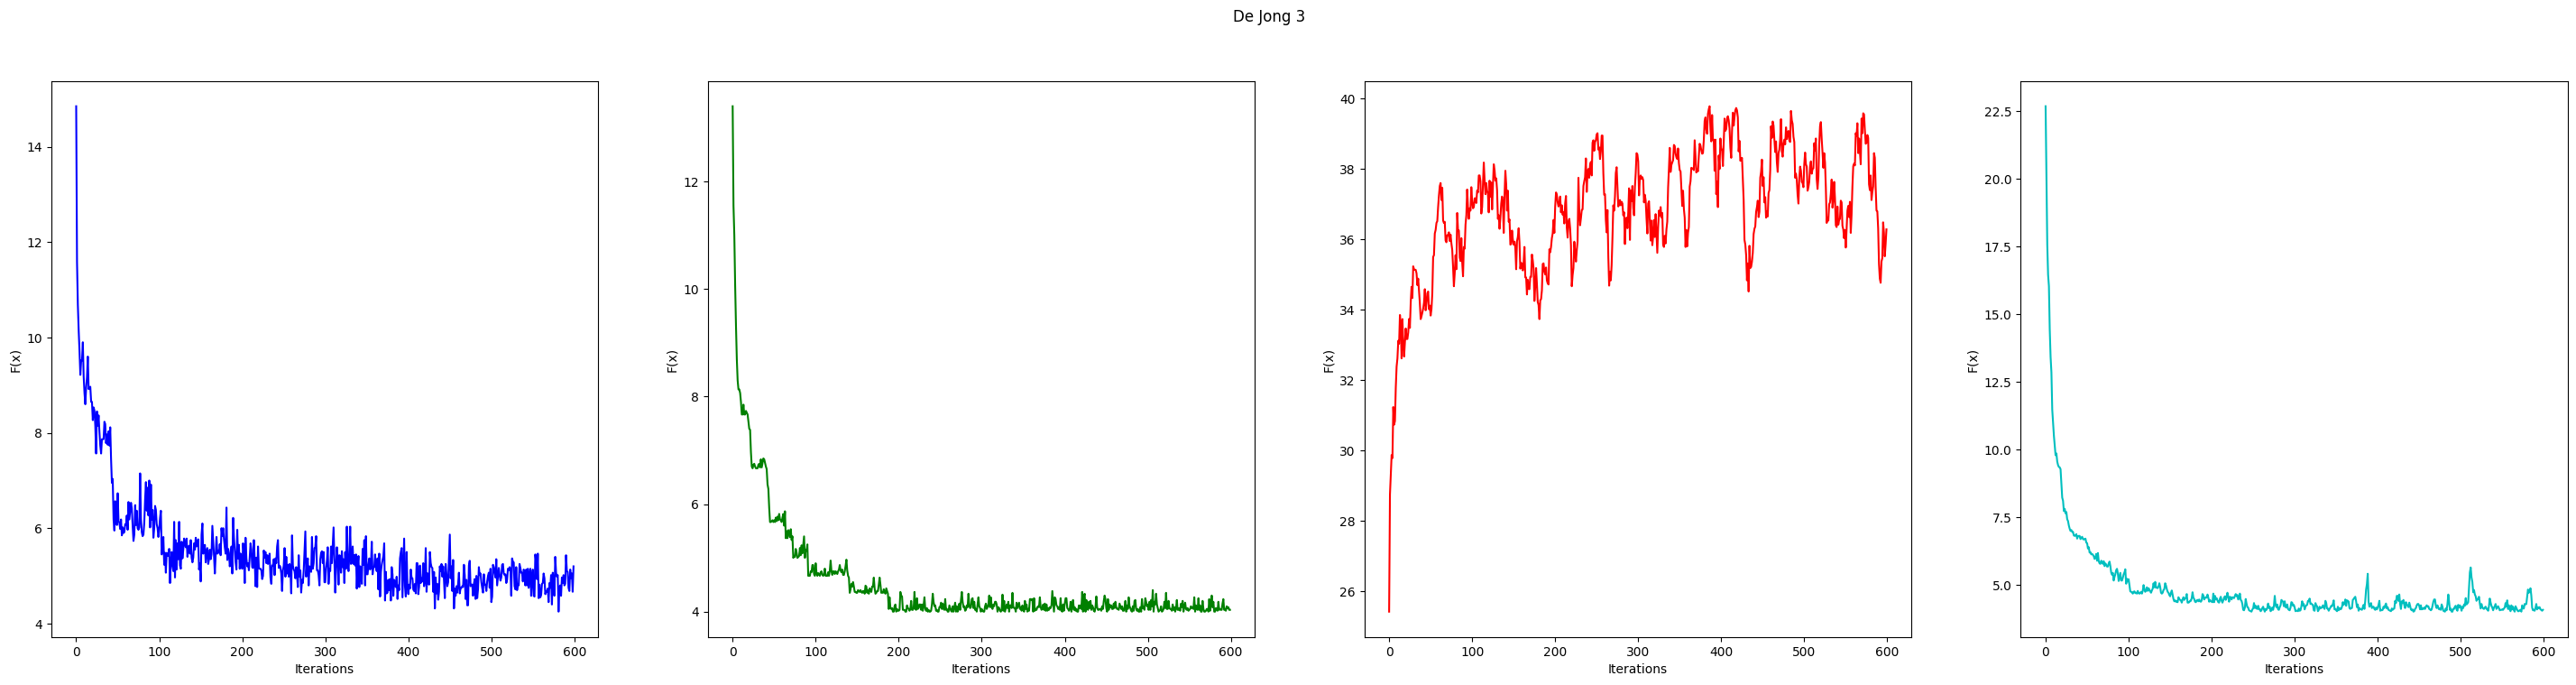

function= De Jong 4,seed = 0, sel_rule = rank, elitism = False
function= De Jong 4,seed = 42, sel_rule = rank, elitism = False
function= De Jong 4,seed = 666, sel_rule = rank, elitism = False
function= De Jong 4,seed = 0, sel_rule = rank, elitism = True
function= De Jong 4,seed = 42, sel_rule = rank, elitism = True
function= De Jong 4,seed = 666, sel_rule = rank, elitism = True
function= De Jong 4,seed = 0, sel_rule = roulette, elitism = False
function= De Jong 4,seed = 42, sel_rule = roulette, elitism = False
function= De Jong 4,seed = 666, sel_rule = roulette, elitism = False
function= De Jong 4,seed = 0, sel_rule = roulette, elitism = True
function= De Jong 4,seed = 42, sel_rule = roulette, elitism = True
function= De Jong 4,seed = 666, sel_rule = roulette, elitism = True


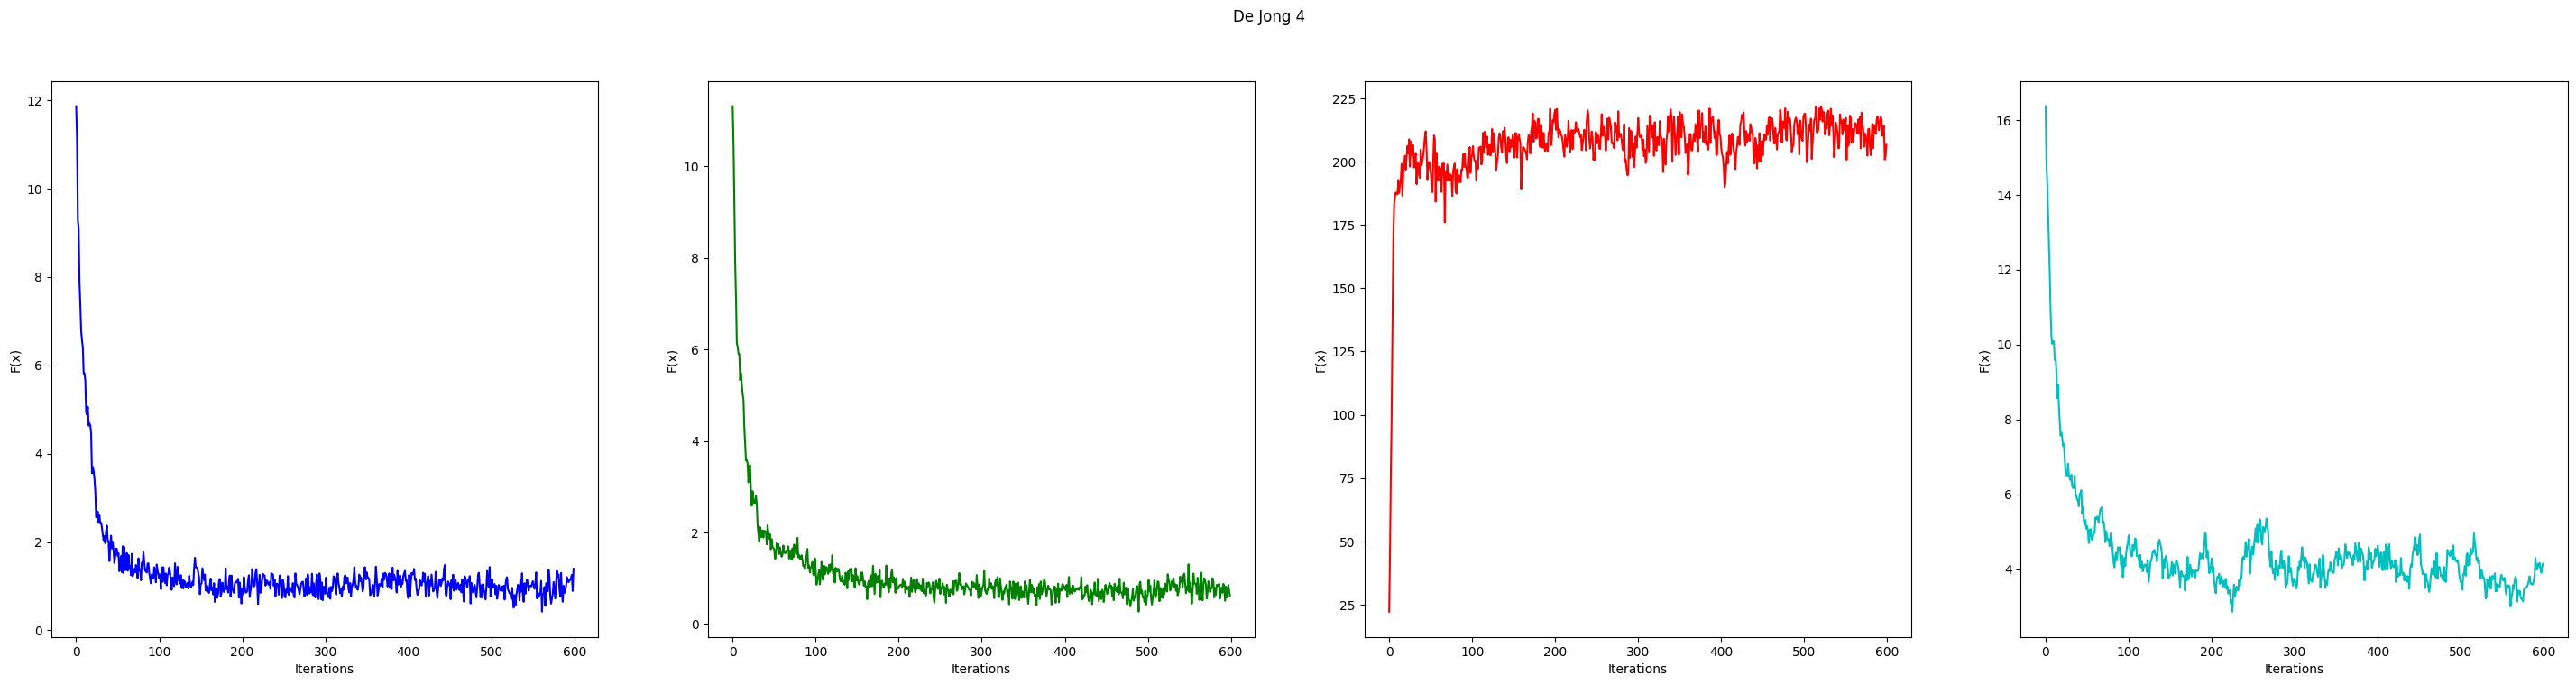

function= De Jong 5,seed = 0, sel_rule = rank, elitism = False
function= De Jong 5,seed = 42, sel_rule = rank, elitism = False
function= De Jong 5,seed = 666, sel_rule = rank, elitism = False
function= De Jong 5,seed = 0, sel_rule = rank, elitism = True
function= De Jong 5,seed = 42, sel_rule = rank, elitism = True
function= De Jong 5,seed = 666, sel_rule = rank, elitism = True
function= De Jong 5,seed = 0, sel_rule = roulette, elitism = False
function= De Jong 5,seed = 42, sel_rule = roulette, elitism = False
function= De Jong 5,seed = 666, sel_rule = roulette, elitism = False
function= De Jong 5,seed = 0, sel_rule = roulette, elitism = True
function= De Jong 5,seed = 42, sel_rule = roulette, elitism = True
function= De Jong 5,seed = 666, sel_rule = roulette, elitism = True


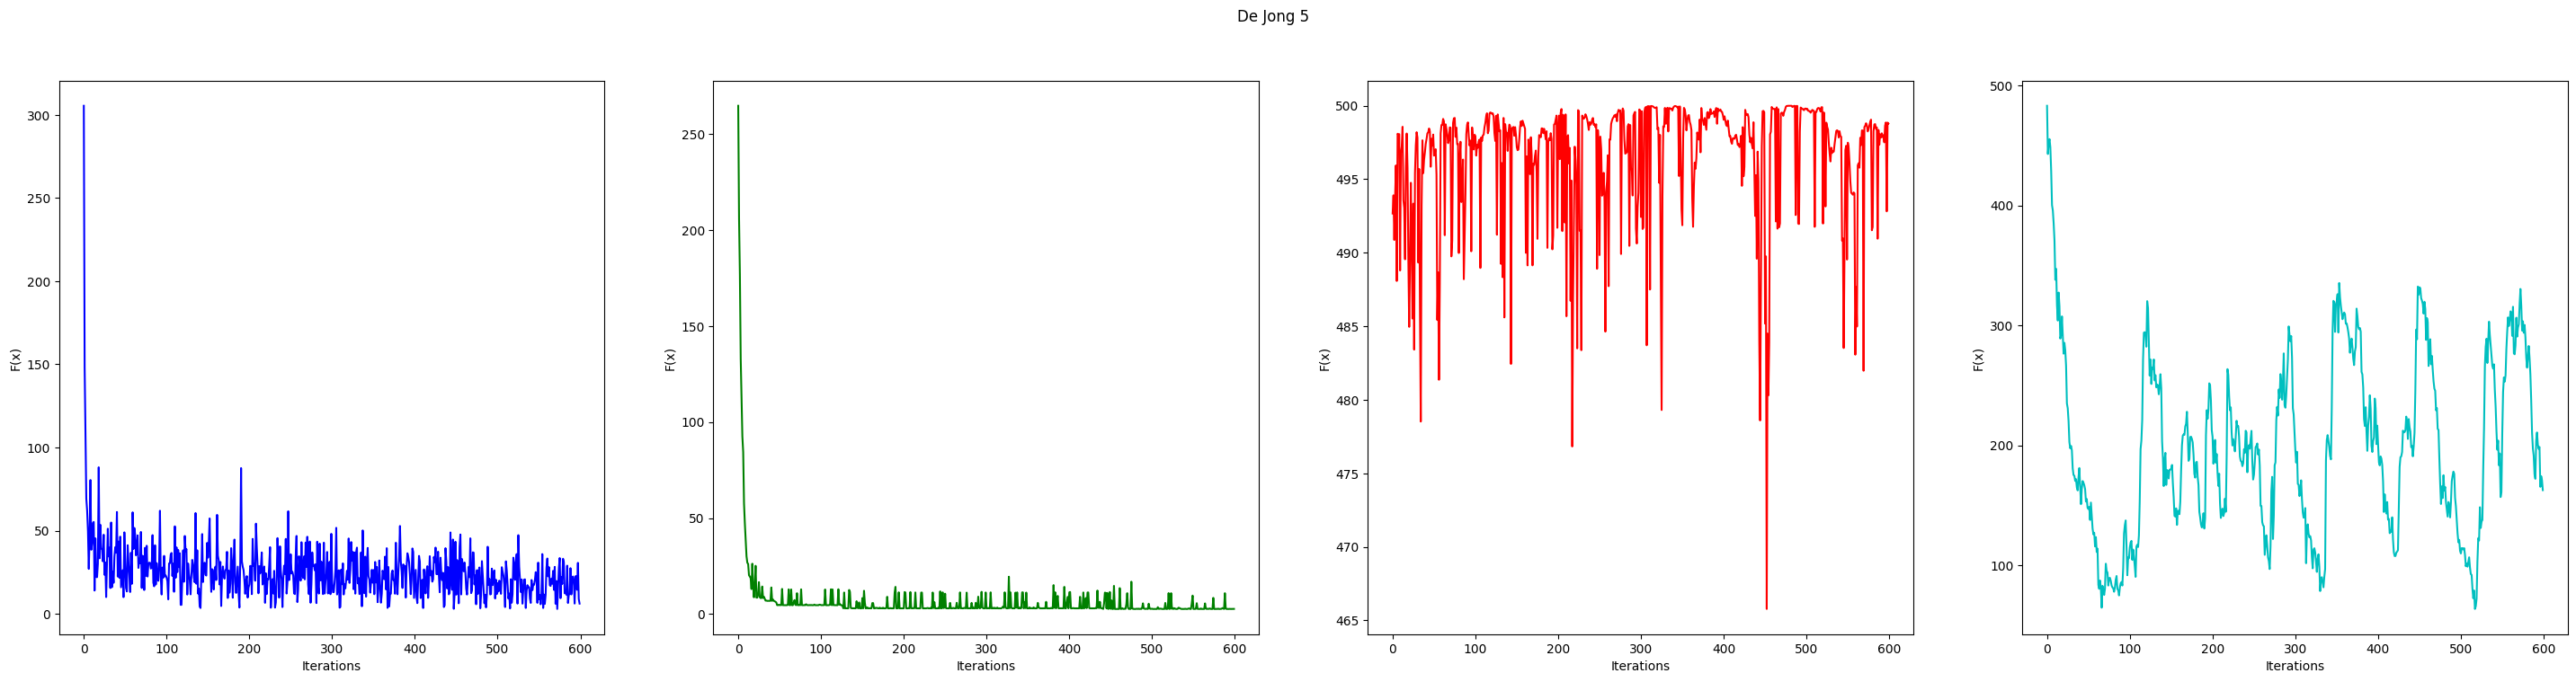

In [39]:
c_labels2 = ['Function', 'Method', 'Best solution',
             'Best fitness value', 'Best iteration']
small_data = []
for function in functions:
    fig, axes = plt.subplots(nrows=1, ncols=len(methods), figsize=(36, 8))
    fig.suptitle(f'{function.function_name}')

    method = 0
    for r_idx, sr in enumerate(selection_rules):
        for index, e  in enumerate(bool_elitism):
            # Create list for averaged statistics
            # ...
            seed_evaluation_list = list()
            mean_of_best_iteration =list()
            mean_of_best_solution = list()
            mean_of_best_fitness = list()
            for seed in seeds:
                np.random.seed(seed)
                print(
                    f"function= {function.function_name},seed = {seed}, sel_rule = {sr}, elitism = {e}")
                GA = GeneticAlgorithmForDJ(
                    dj_instance=function, selection_rule=sr, elitism=e)
                GA.solve()
                seed_evaluation_list.append(GA.evaluations)
                best_solution = [GA.dj_instance.gray_decode(
                    i) for i in GA.best_solution]
                mean_of_best_iteration.append(GA.best_iteration)
                mean_of_best_solution.append(best_solution)
                mean_of_best_fitness.append(GA.best_evaluation)
                # Populate statistics lists
                # ...
            new_evaluations =list()
            its = np.mean(mean_of_best_iteration)
            sols =np.mean(mean_of_best_solution)
            fitness_mean=np.mean(mean_of_best_fitness)
            for i in range(len(seed_evaluation_list[0])):
                first, second, third = seed_evaluation_list[0][i], seed_evaluation_list[1][i], seed_evaluation_list[2][i]
                    
                means = (first+second+third)/3.
                new_evaluations.append(means)
            #means = sums/float(len(seed_evaluation_list))
            #small_data.append(means)
            axes[r_idx*2+index].plot(list(range(0, 600)), new_evaluations, color=colors[r_idx*2+index])
            axes[r_idx*2+index].set_xlabel("Iterations")
            axes[r_idx*2+index].set_ylabel("F(x)")
            # Average the statistics on seed
            # ...

            # Plot
            # ...

            # Populate dataframe
            small_data.append([function.function_name, sr,
                            sols,fitness_mean, its])
            
            #import os
    
    #os.mkdir("images")
    plt.savefig('images/' + function.function_name + '.png', dpi=600)
    plt.show()

small_df = pd.DataFrame(small_data, columns=c_labels2)


In [40]:
# Display dataframe
small_df


Function    Method  Best solution  Best fitness value  Best iteration
0   De Jong 1      rank       0.007778            0.000000       48.333333
1   De Jong 1      rank       0.000000            0.000000       72.333333
2   De Jong 1  roulette      -1.947778            0.000000       21.333333
3   De Jong 1  roulette      -0.253333            0.000000        1.666667
4   De Jong 2      rank       0.674833            0.043620      598.666667
5   De Jong 2      rank       0.653000            0.000000      599.000000
6   De Jong 2  roulette      -0.392167            0.000000       10.000000
7   De Jong 2  roulette      -0.300333            0.000000        4.000000
8   De Jong 3      rank      -5.064167            0.333333      599.000000
9   De Jong 3      rank      -5.063333            0.000000      599.000000
10  De Jong 3  roulette      -1.680833            0.000000        2.333333
11  De Jong 3  roulette      -3.687500            0.000000        2.000000
12  De Jong 4      rank       0.017889           -1.112209       16.333333
13  De Jong 4      rank      -0.068333           -1.053644       93.333333
14  De Jong 4  roulette       0.088444            0.000000        6.666667
15  De Jong 4  roulette       0.025333            0.000000       15.333333
16  De Jong 5      rank     -29.307333            0.000000      599.000000
17  De Jong 5      rank     -29.307333            0.000000      599.000000
18  De Jong 5  roulette     -11.730833            0.000000       22.000000
19  De Jong 5  roulette      -8.370833            0.000000       12.666667

# Report
As one can easily see, the fitness functions plotted above goes down as we expected. Indeed, the goal of the assignment is to minimize the Jong functions.
 (Note that I considered the fitness function as an evaluation of the Jong function. That's why I assigned to the points located near the maximum of the function a small probability)
Unfortunately, when we look at the fitness functions (with roulette selction and no elitism) over the time, the fitness functions tends to go up instead of going down. Therefore, there could be a bug. However, considering the overall results, I suppose I got what I was supposed to obtain. 